In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

#Read the file and format it as Pandas Dataframe
census_info = pd.read_csv('NCHS_-_Age-adjusted_Death_Rates_for_the_Top_10_Leading_Causes_of_Death__United_States__2013.csv')
#.head() shows the header and the first 5 lines of the file
census_info.head()


YEAR 113_CAUSE_NAME  CAUSE_NAME       STATE  DEATHS    AADR
0  1999     All Causes  All Causes     Alabama   44806  1009.3
1  1999     All Causes  All Causes      Alaska    2708   838.9
2  1999     All Causes  All Causes     Arizona   40050   818.4
3  1999     All Causes  All Causes    Arkansas   27925   975.3
4  1999     All Causes  All Causes  California  229380   802.3

In [2]:
#.unique() allows the dataframe to return the unique value of the given column name
all_death_cause = census_info['CAUSE_NAME'].unique()

#The following code shows number of causes of death, as well as their identities
print(len(all_death_cause), 'Unique causes of death: ')
for death_cause in all_death_cause:
    print('-',death_cause)

17 Unique causes of death: 
- All Causes
- Alzheimer's disease
- Cancer
- Chronic liver disease and cirrhosis
- CLRD
- Diabetes
- Diseases of Heart
- Essential hypertension and hypertensive renal disease
- Homicide
- Influenza and pneumonia
- Kidney Disease
- Parkinson's disease
- Pneumonitis due to solids and liquids
- Septicemia
- Stroke
- Suicide
- Unintentional Injuries


In [3]:
# Extracting data that belongs to YEAR 1999 only
year1999_df = census_info.loc[census_info['YEAR']==1999]
year1999_df.head()

YEAR 113_CAUSE_NAME  CAUSE_NAME       STATE  DEATHS    AADR
0  1999     All Causes  All Causes     Alabama   44806  1009.3
1  1999     All Causes  All Causes      Alaska    2708   838.9
2  1999     All Causes  All Causes     Arizona   40050   818.4
3  1999     All Causes  All Causes    Arkansas   27925   975.3
4  1999     All Causes  All Causes  California  229380   802.3

E:\Anaconda\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


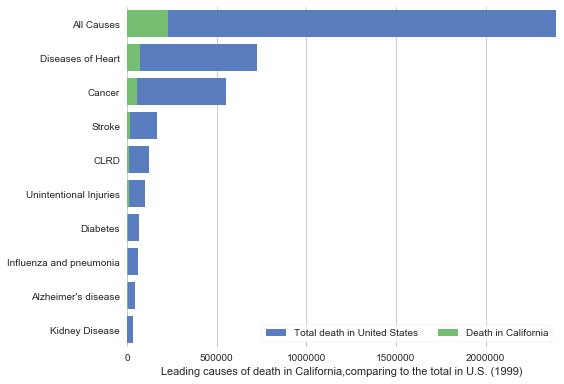

In [4]:
#We use seaborn here to quickly construct a barplot
import seaborn as sns

#setting the style of seaborn as whitegrid
sns.set(style="whitegrid")

#Constructing two dataframes for California data and United States data
#Prepare for sns.barplot data input

#California 1999 dataframe constructed
cali_year1999_df = year1999_df.loc[census_info['STATE']=='California',:]

#Cast the value of the DEATHS and AADR to numeric for downstream plotting
#It is possible to do it at the beginning, but we want to cast the value here to remind the
#readers that it is important to check the value type before doing visualization!
cali_year1999_df[['DEATHS','AADR']]=cali_year1999_df[['DEATHS','AADR']].apply(pd.to_numeric)

#United States 1999 dataframe constructed
us_year1999_df = year1999_df.loc[census_info['STATE']=='United States',:]

#Cast the value of the DEATHS and AADR to numeric for downstream plotting
#It is possible to do it at the beginning, but we want to cast the value here to remind the
#readers that it is important to check the value type before doing visualization!
us_year1999_df[['DEATHS','AADR']]=us_year1999_df[['DEATHS','AADR']].apply(pd.to_numeric)

#Here is the 10 major causes of death that we are interested in showing
ranking_death = ['All Causes','Diseases of Heart','Cancer','Stroke','CLRD',\
                 'Unintentional Injuries','Diabetes','Influenza and pneumonia',\
                 'Alzheimer\'s disease','Kidney Disease']

#Plot Boxplot, initialize plt and set figure size 
f, ax = plt.subplots()

#To draw a set of horizontal bars, we put the CAUSE_NAME as y-axis and DEATHS as x-axis
sns.set_color_codes("muted")
sns.barplot(x="DEATHS",y="CAUSE_NAME", data=us_year1999_df, label='Total death in United States',\
            order=ranking_death,color='b')
sns.barplot(x="DEATHS", y="CAUSE_NAME", data=cali_year1999_df, label="Death in California",\
            order=ranking_death,color="g")
#Put figure legend, with frame around it
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 2400000), ylabel="", xlabel="Leading causes of death in California,\
comparing to the total in U.S. (1999)")
#.despine() is useful in removing the spines from plot(s)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig('Leading_causes_of_death_in_California_and_US_1999.png',dpi=300)
sns.plt.show()


In [ ]:
# Map-based visualization for geographical data

In [6]:
#To begin, we import the geopandas library as gpd
import geopandas as gpd

#One easy map that you can used is 'naturalearth_lowres'
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#What is in the pandas dataframe? .head() to show the first 5 lines
world.head()


pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0           Asia           Afghanistan    AFG     22270.0   
1  12799293.0         Africa                Angola    AGO    110300.0   
2   3639453.0         Europe               Albania    ALB     21810.0   
3   4798491.0           Asia  United Arab Emirates    ARE    184300.0   
4  40913584.0  South America             Argentina    ARG    573900.0   

                                            geometry  
0  POLYGON ((61.21081709172574 35.65007233330923,...  
1  (POLYGON ((16.32652835456705 -5.87747039146621...  
2  POLYGON ((20.59024743010491 41.85540416113361,...  
3  POLYGON ((51.57951867046327 24.24549713795111,...  
4  (POLYGON ((-65.50000000000003 -55.199999999999...

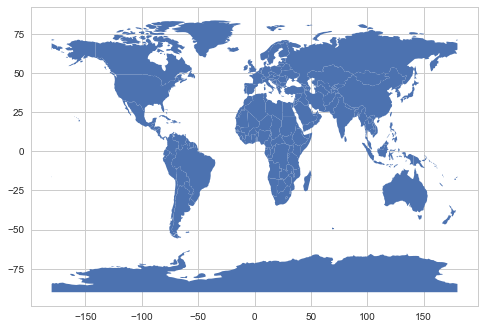

In [7]:
import matplotlib.pyplot as plt

#Construct your first world map!
f, ax = plt.subplots()
world.plot(ax=ax)
plt.savefig('worldmap.png',dpi=300)
plt.show()

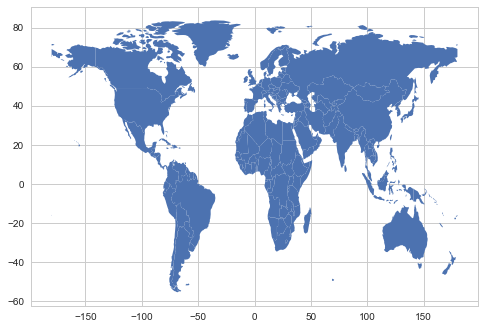

In [8]:
f, ax = plt.subplots()

#Removing Antarctica from the map
#The way to do so is just normal Pandas dataframe operation
world_without_antarctica = world[world['name']!='Antarctica']
world_without_antarctica.plot(ax=ax)
plt.savefig('worldmap_without_antarctica.png',dpi=300)
plt.show()

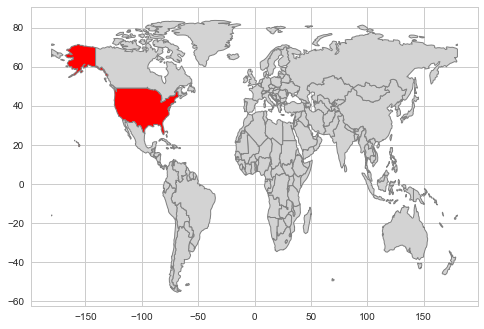

In [9]:
f, ax = plt.subplots()

#Using the map without antarctica here
world_without_antarctica[world_without_antarctica['name']=='United States'].plot(ax=ax,\
                                    edgecolor='grey', facecolor='red', linewidth=1, alpha=1)

#Also include other countries but we are coloring them in light grey
world_without_antarctica[world_without_antarctica['name']!='United States'].plot(ax=ax,\
                                    edgecolor='grey', facecolor='lightgrey', linewidth=1, alpha=1)
plt.savefig('worldmap_without_antarctica_colored.png',dpi=300)
plt.show()

In [10]:
#From here, we import the cartographic boundary shapefile obtained from census.gov
states = gpd.read_file('cb_2016_us_state_500k.shp')

# states.reset_index(inplace=True)
states.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS        NAME LSAD          ALAND  \
0      01  01779775  0400000US01    01     AL     Alabama   00   131173688951   
1      02  01785533  0400000US02    02     AK      Alaska   00  1477946266785   
2      04  01779777  0400000US04    04     AZ     Arizona   00   294198560125   
3      05  00068085  0400000US05    05     AR    Arkansas   00   134771517596   
4      06  01779778  0400000US06    06     CA  California   00   403501101370   

         AWATER                                           geometry  
0    4593686489  (POLYGON ((-88.053375 30.506987, -88.051087999...  
1  245390495931  (POLYGON ((-134.737262 58.261354, -134.73441 5...  
2    1027346486  POLYGON ((-114.816294 32.508038, -114.814321 3...  
3    2960191698  POLYGON ((-94.6178329666013 36.4994141203285, ...  
4   20466718403  (POLYGON ((-118.604415 33.478552, -118.598783 ...

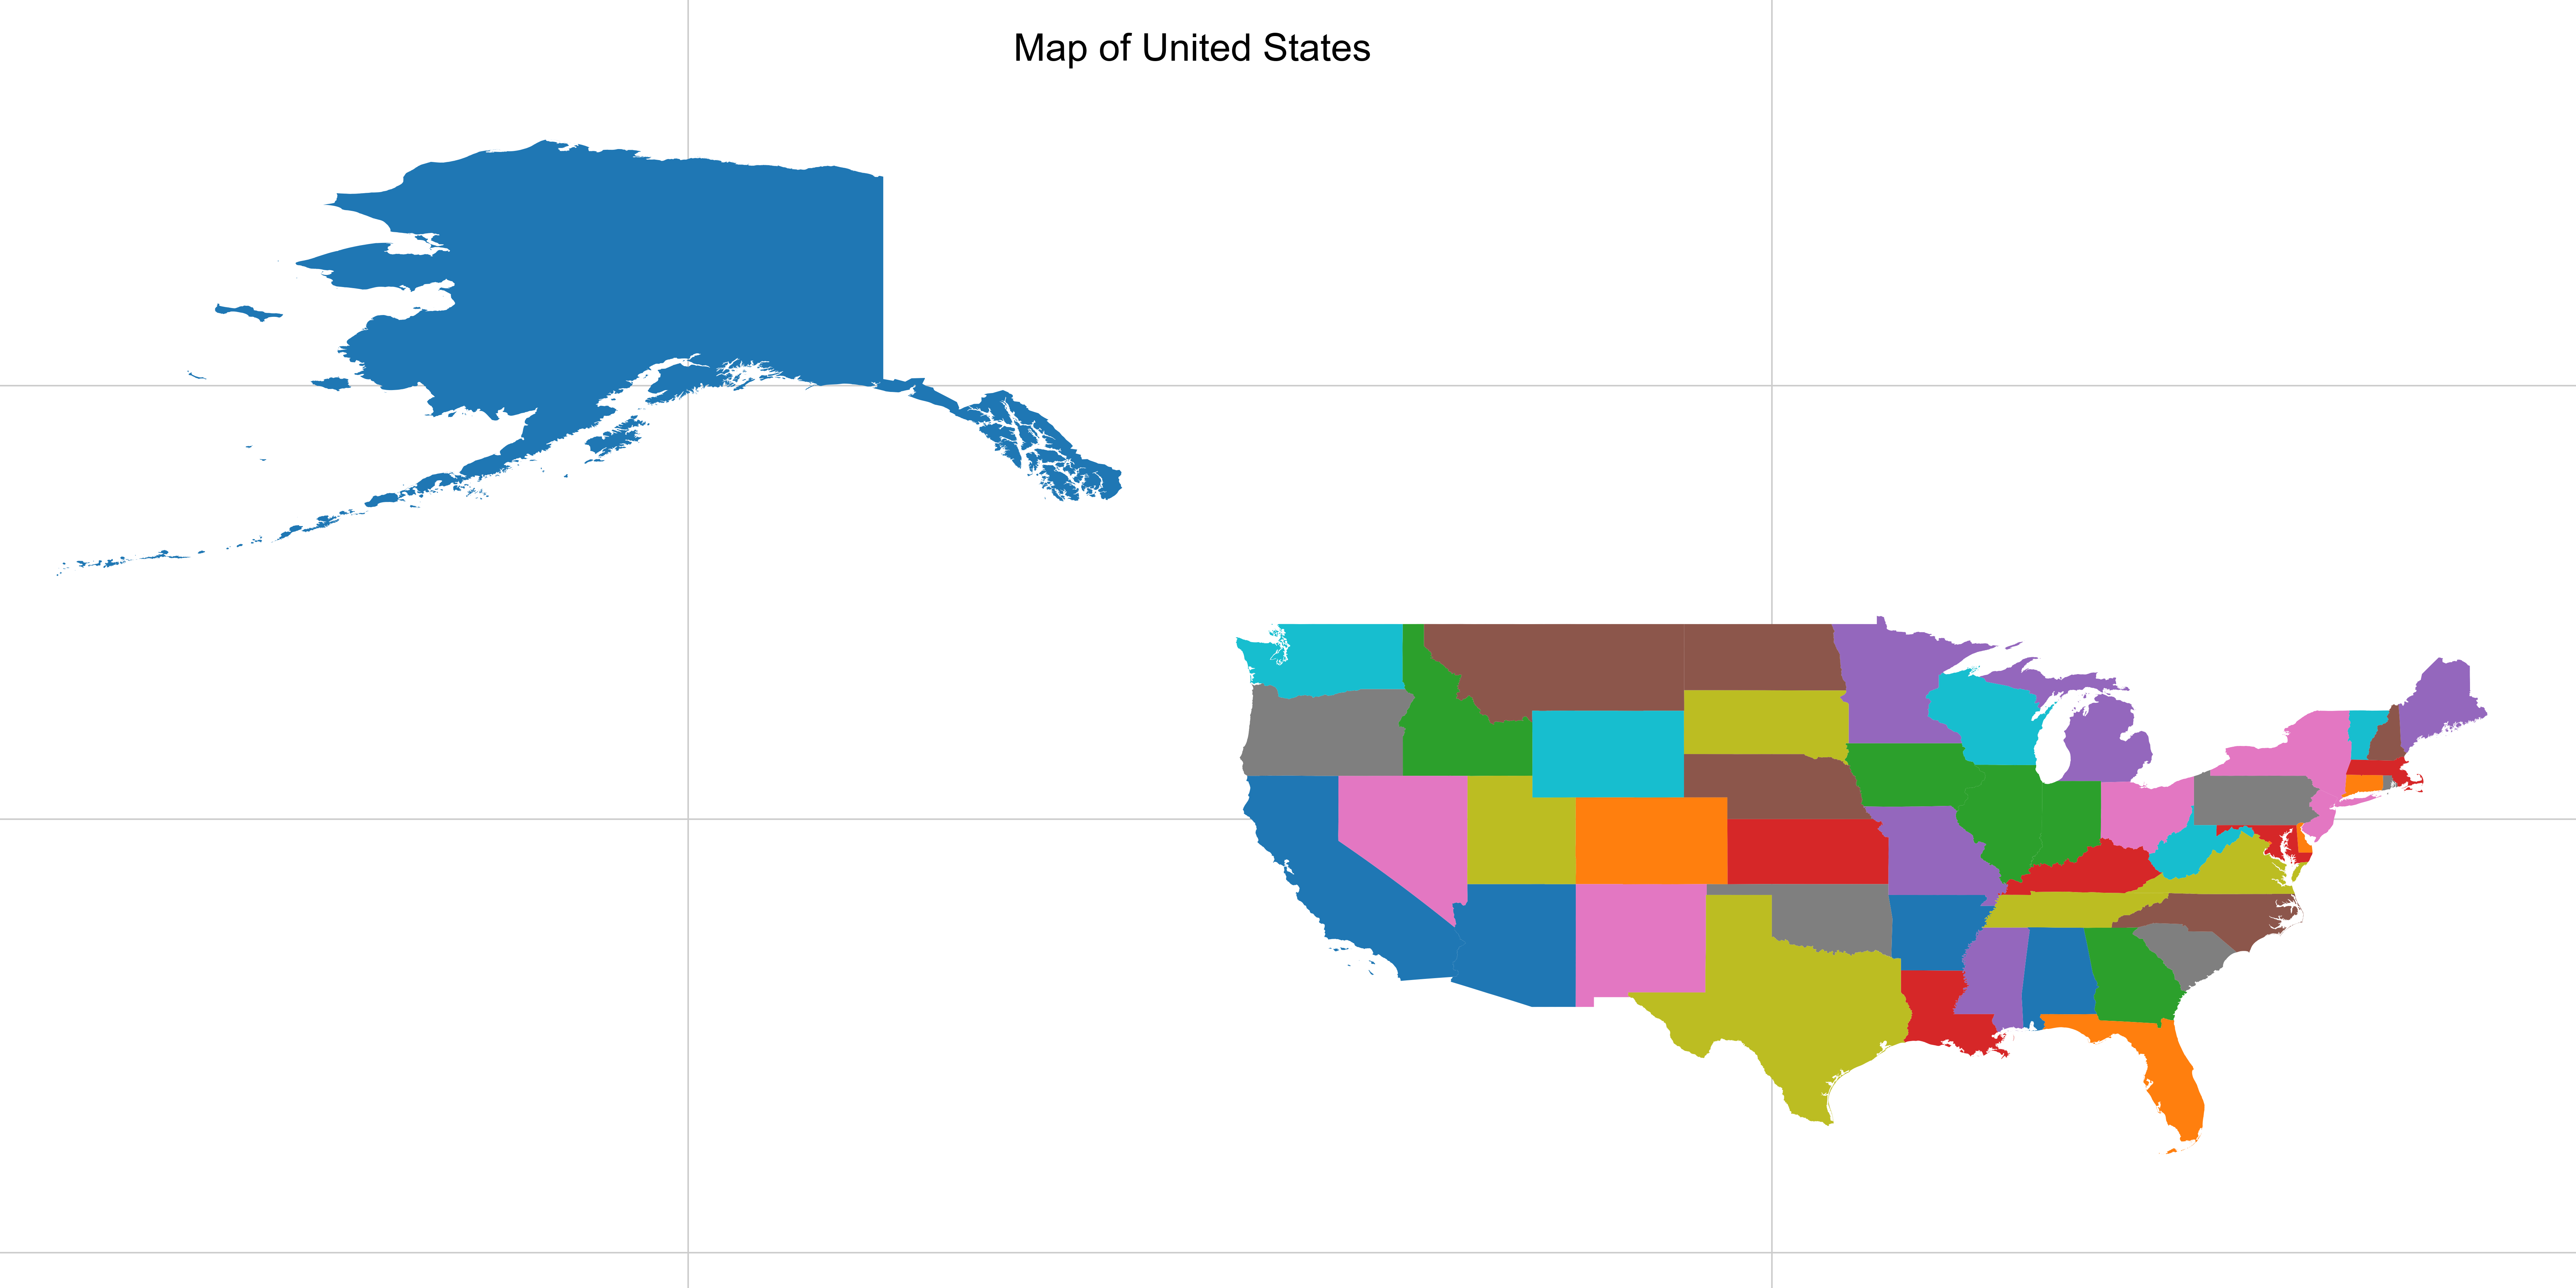

In [11]:
#Importing the PIL library for image processing
#Image.MAX_IMAGE_PIXELS is set to be a large number to avoid warning from Python
from PIL import Image, ImageChops
Image.MAX_IMAGE_PIXELS = 1000000000

#This function identifies the border of the image and perform a trimming
#The crop() function further crop the image and zoom to US in here
def trim(image):
    img = Image.open(image)
    border = Image.new(img.mode, img.size, img.getpixel((0, 0)))
    diff = ImageChops.difference(img, border)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        img = img.crop(bbox)
    img_crop = img.crop((1000,2500,8000,6000))
    return img_crop

#Initializing
f, ax = plt.subplots()

#Using standard Pandas operation, we remove the following places from the states geopandas dataframe
refined_states = states[(states['STUSPS']!='GU')&(states['STUSPS']!='PR')&(states['STUSPS']!='MP')&\
                        (states['STUSPS']!='VI')&(states['STUSPS']!='HI')&(states['STUSPS']!='AS')]
#We plot the refined states as shown below, with a figsize of (100,40)
#The coloring can be specified using column='STUSPS'
refined_states.plot(figsize=(100,40), column='STUSPS')
plt.axis('equal')
#Since we are cropping the image at later steps, we put the title right above the map
plt.annotate('Map of United States',xy=(-135,75),color='black',size=25)
plt.savefig('states_map.png', dpi=300)
visualizing_states_img = trim('states_map.png')
visualizing_states_img.save('states_map_crop.png')
visualizing_states_img

#plt.show()



In [ ]:
# Combining geographical and population health data

In [12]:
#Extracting all the cancer data in year 1999
cancer_year1999_df = year1999_df.loc[census_info['CAUSE_NAME']=='Cancer']

#Renaming the column name in refined_states dataframe
refined_states = refined_states.rename(columns = {'NAME':'STATE'})

#Perform merging of two dataframes, the merge depends on the column "STATE"
merged_cancer_1999_df = pd.merge(refined_states,cancer_year1999_df, on='STATE')

#Again, we want to stress the importance of casting data before doing any visualization
merged_cancer_1999_df[['DEATHS','AADR']]=merged_cancer_1999_df[['DEATHS','AADR']].apply(pd.to_numeric)
merged_cancer_1999_df.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS       STATE LSAD          ALAND  \
0      01  01779775  0400000US01    01     AL     Alabama   00   131173688951   
1      02  01785533  0400000US02    02     AK      Alaska   00  1477946266785   
2      04  01779777  0400000US04    04     AZ     Arizona   00   294198560125   
3      05  00068085  0400000US05    05     AR    Arkansas   00   134771517596   
4      06  01779778  0400000US06    06     CA  California   00   403501101370   

         AWATER                                           geometry  YEAR  \
0    4593686489  (POLYGON ((-88.053375 30.506987, -88.051087999...  1999   
1  245390495931  (POLYGON ((-134.737262 58.261354, -134.73441 5...  1999   
2    1027346486  POLYGON ((-114.816294 32.508038, -114.814321 3...  1999   
3    2960191698  POLYGON ((-94.6178329666013 36.4994141203285, ...  1999   
4   20466718403  (POLYGON ((-118.604415 33.478552, -118.598783 ...  1999   

                  113_CAUSE_NAME CAUSE_NAME  DEATHS    AADR  
0  Malignant neoplasms (C00-C97)     Cancer    9506  210.90  
1  Malignant neoplasms (C00-C97)     Cancer     633  190.54  
2  Malignant neoplasms (C00-C97)     Cancer    9006  179.90  
3  Malignant neoplasms (C00-C97)     Cancer    6137  214.07  
4  Malignant neoplasms (C00-C97)     Cancer   53067  184.86

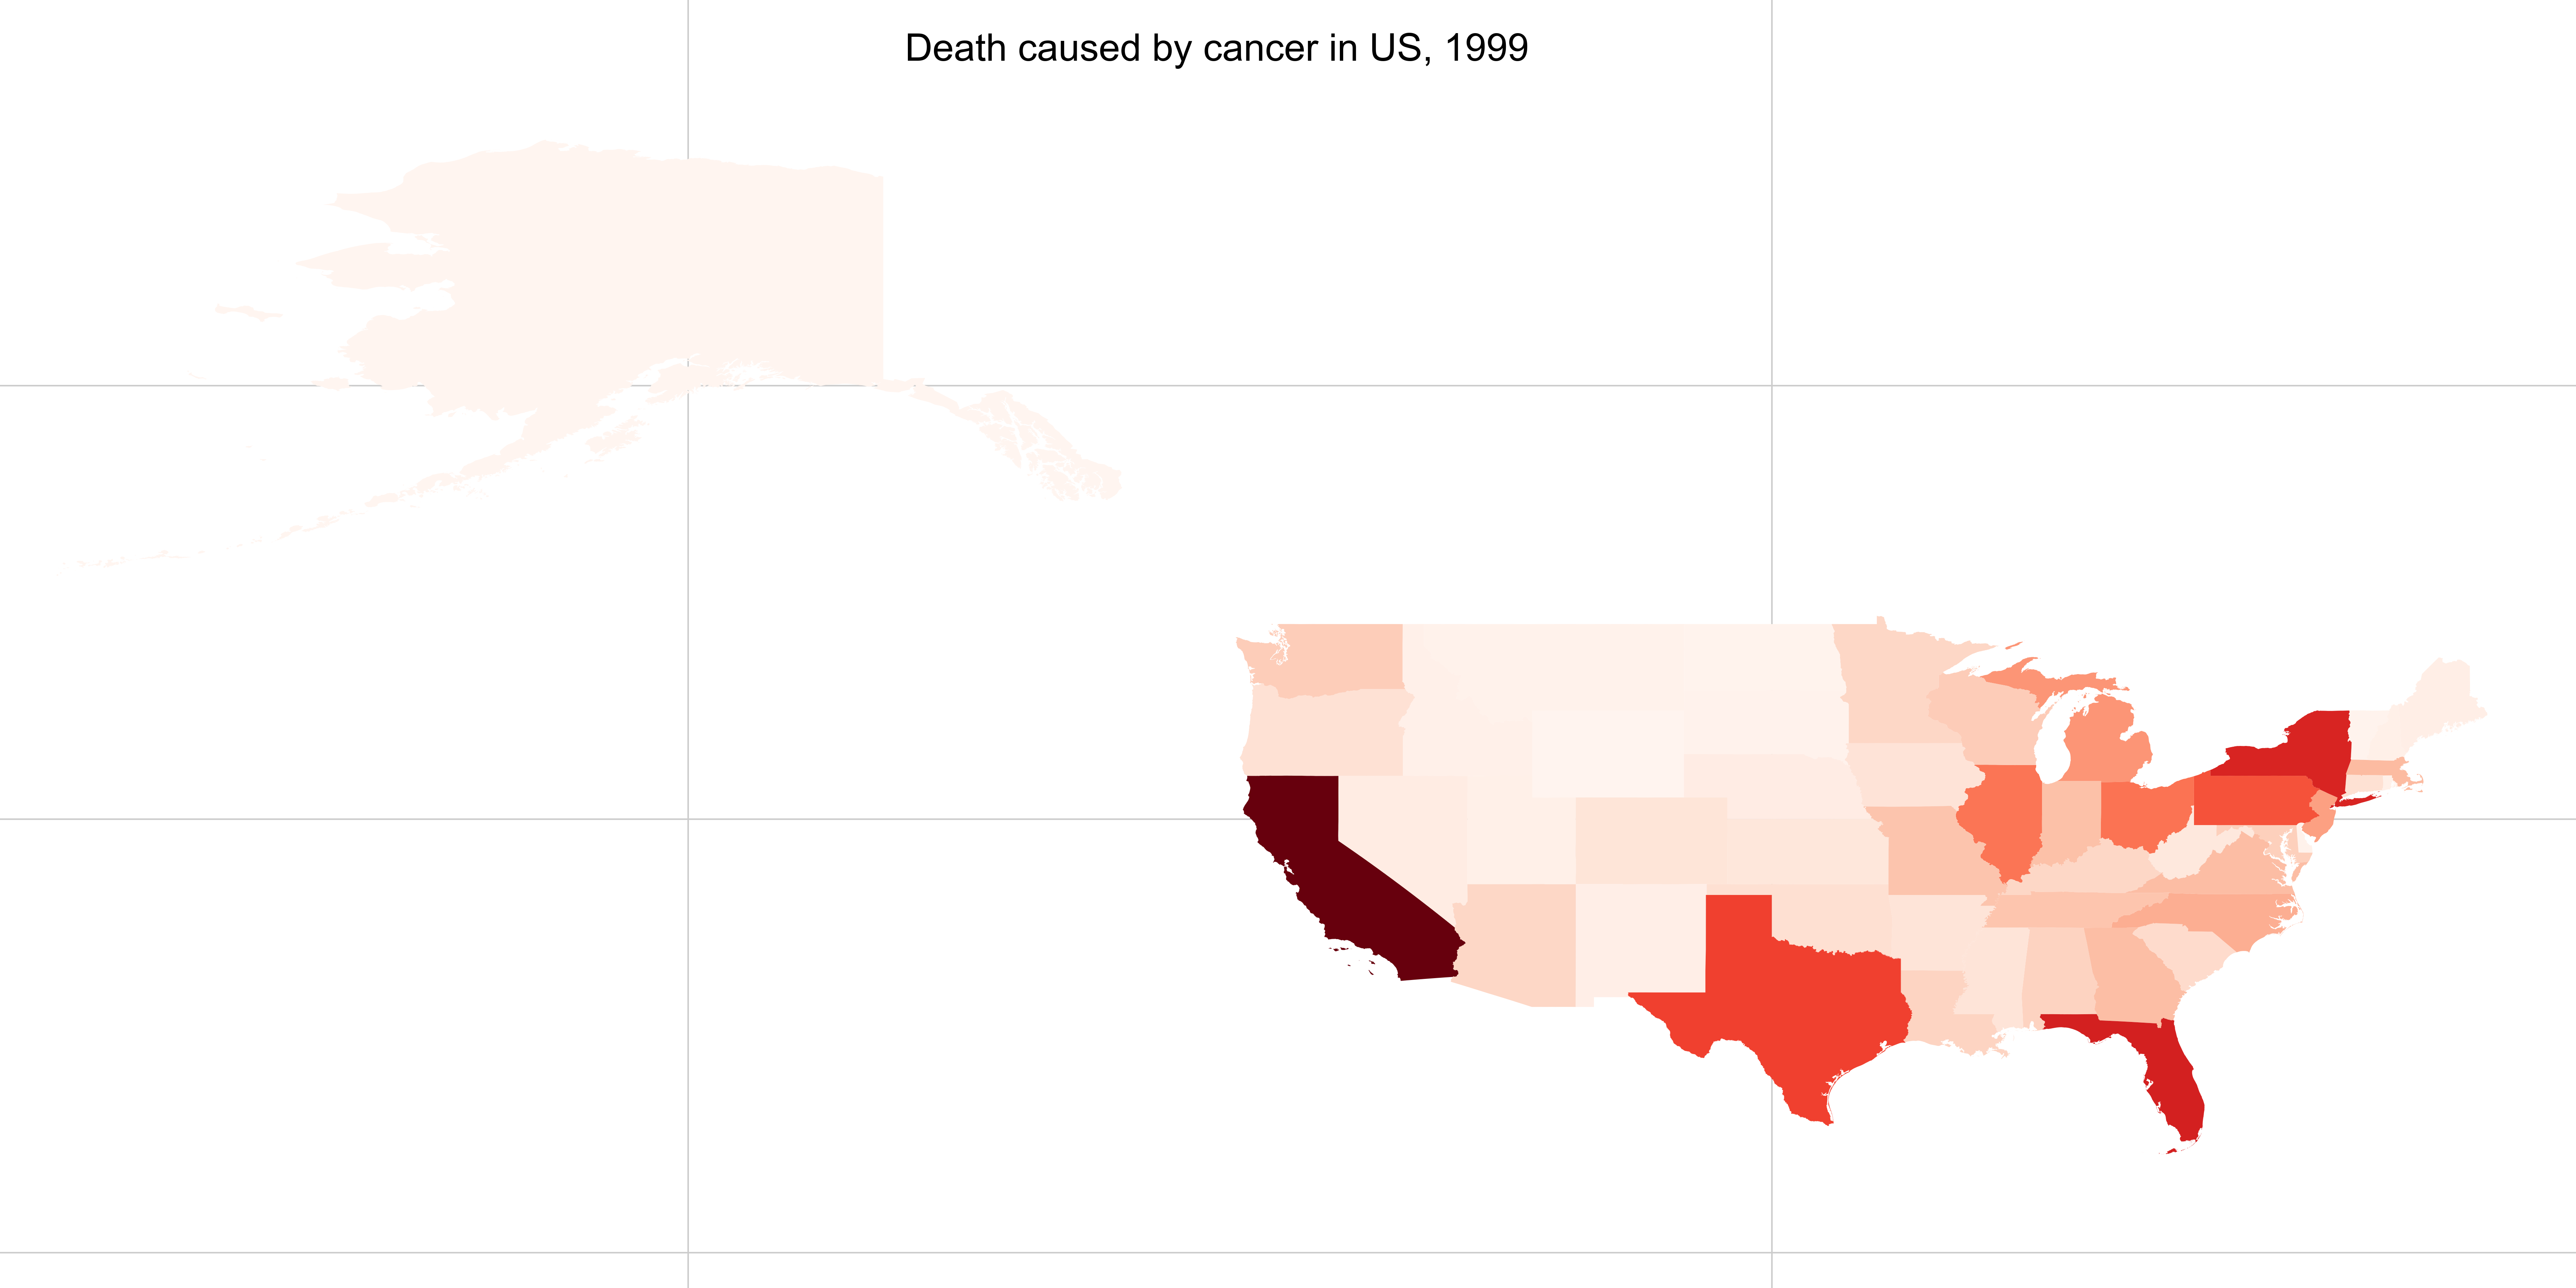

In [13]:
#Initializing
f, ax = plt.subplots()

#Plotting the map using the merged dataframe
merged_cancer_1999_df.plot(column='DEATHS',cmap='Reds',figsize=(100,40))
plt.axis('equal')

#Annotating the plot
plt.annotate('Death caused by cancer in US, 1999',xy=(-140,75),color='black',size=25)
plt.savefig('US_cancer_death_num_1999.png',dpi=300)

#Trimming the plot to give a larger image using PIL library and Image processing
cancer_death_visualization_img = trim('US_cancer_death_num_1999.png')
cancer_death_visualization_img.save('US_cancer_death_num_1999_crop.png')
cancer_death_visualization_img

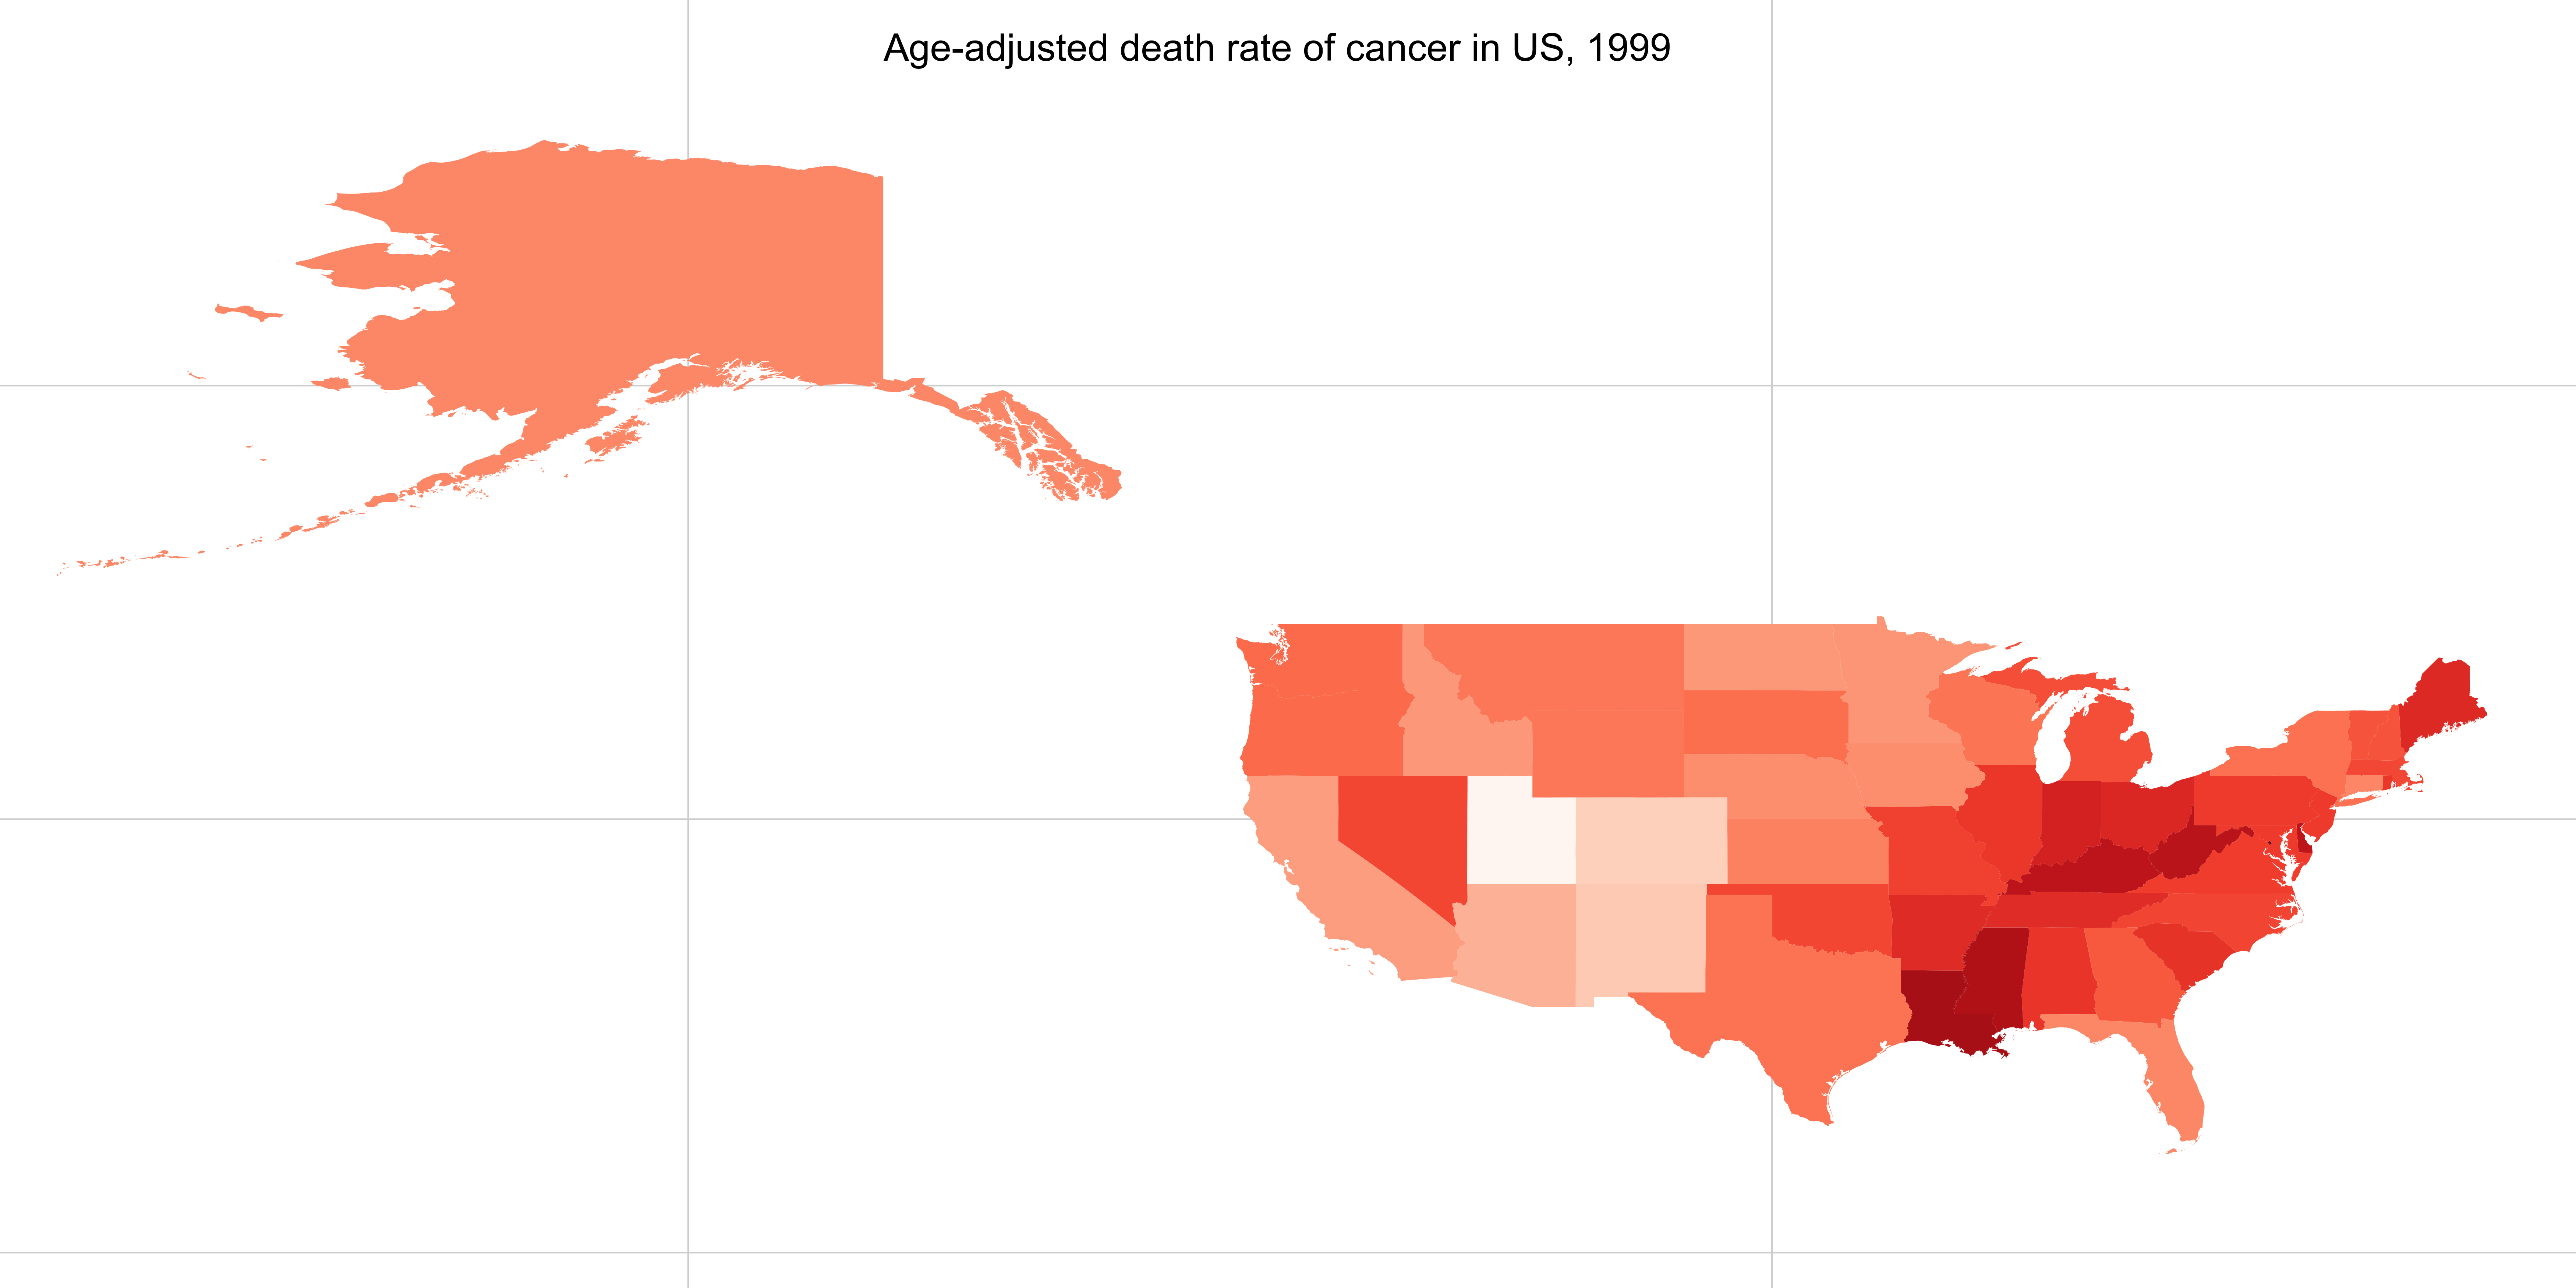

In [14]:
#Initializing
f, ax = plt.subplots()

#Plotting the map again, this time the value is extracted from column 'AADR' instead of 'DEATHS'
merged_cancer_1999_df.plot(column='AADR',cmap='Reds',figsize=(100,40))
ax.grid(False)
plt.axis('equal')

#Annotating the plot
plt.annotate('Age-adjusted death rate of cancer in US, 1999',xy=(-141,75),color='black',size=25)
plt.savefig('US_cancer_AADR_1999.png',dpi=300)

#Trimming the plot to give a larger image using PIL library and Image processing
cancer_visualization_img = trim('US_cancer_AADR_1999.png')
cancer_visualization_img.save('US_cancer_AADR_1999_crop.png')
cancer_visualization_img

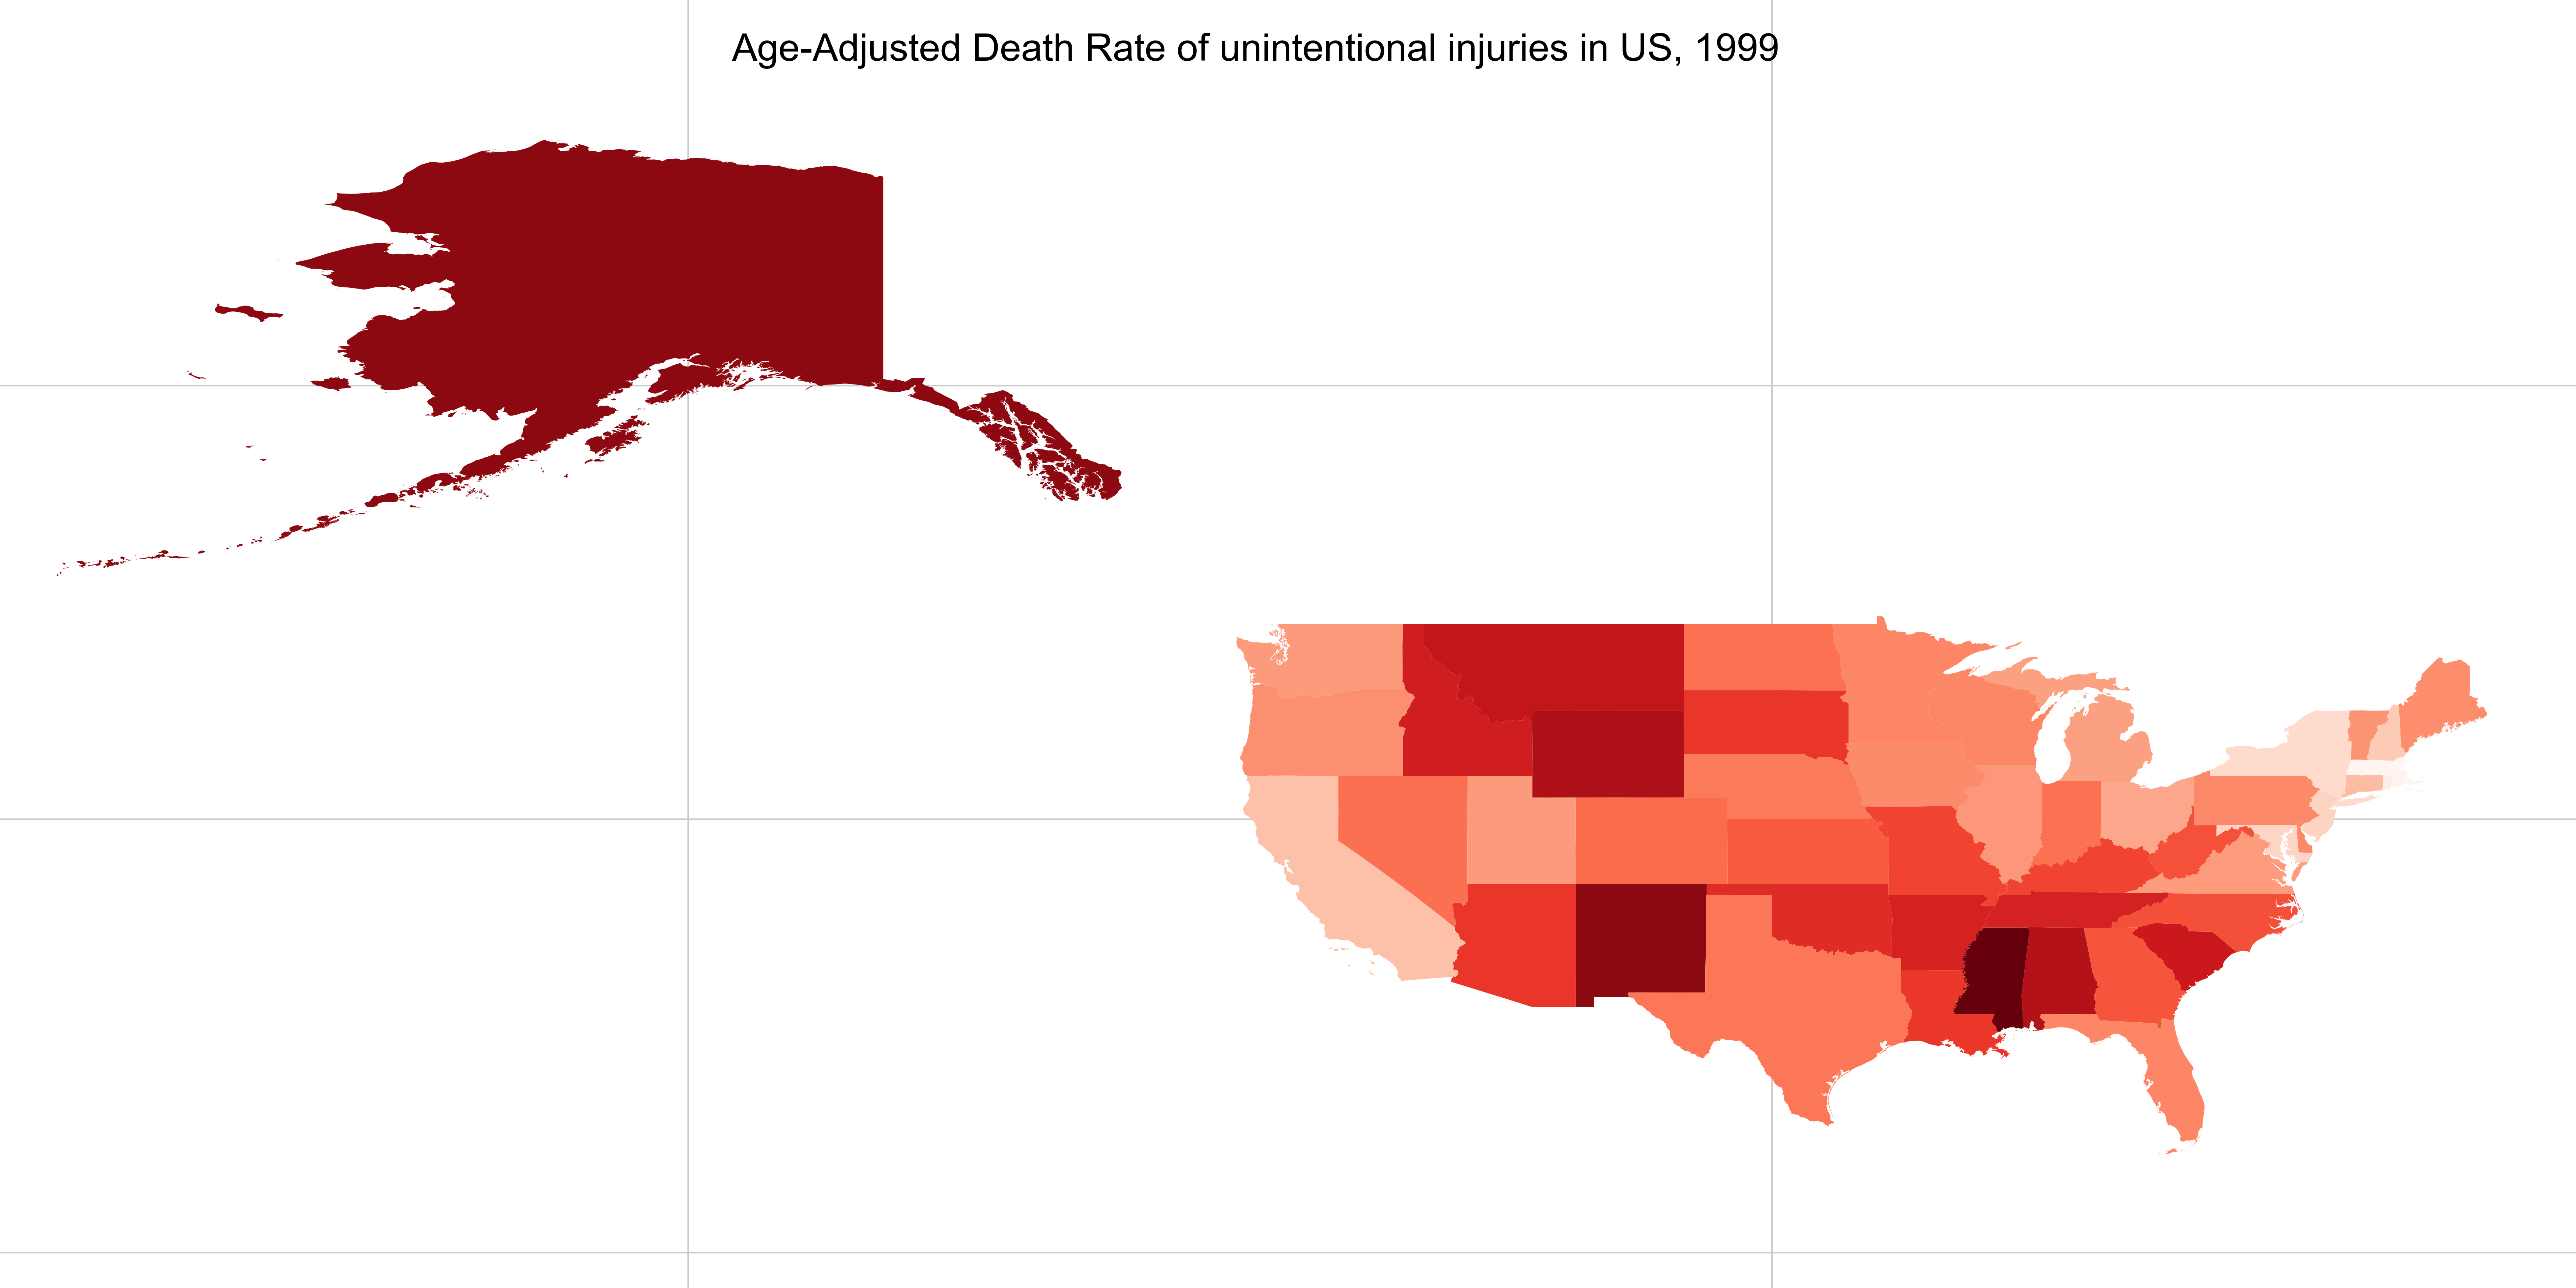

In [15]:
#Initializing
plt.clf()
f, ax = plt.subplots()

#Similar to what we have done previously
#we are extracting the data correspond to unintentional injuries from year 1999
unintent_death_1999_df = year1999_df.loc[census_info['CAUSE_NAME']=='Unintentional Injuries']
merged_unintent_death_1999_df = pd.merge(refined_states,unintent_death_1999_df, on='STATE')
merged_unintent_death_1999_df[['DEATHS','AADR']]=merged_unintent_death_1999_df[['DEATHS','AADR']].apply(pd.to_numeric)

#Plotting the map showing AADR of unintentional injuries in US, 1999
merged_unintent_death_1999_df.plot(column='AADR',cmap='Reds',figsize=(100,40))
ax.grid(False)
plt.axis('equal')
plt.annotate('Age-Adjusted Death Rate of unintentional injuries in US, 1999',xy=(-148,75),color='black',size=25)
plt.savefig('US_unintent_AADR_1999.png',dpi=300)

#Trimming the plot to give a larger image using PIL library and Image processing
unintent_death_visualization_img = trim('US_unintent_AADR_1999.png')
unintent_death_visualization_img.save('US_unintent_AADR_1999_crop.png')
unintent_death_visualization_img


E:\Anaconda\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


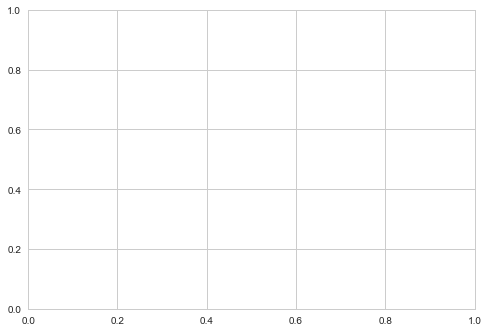

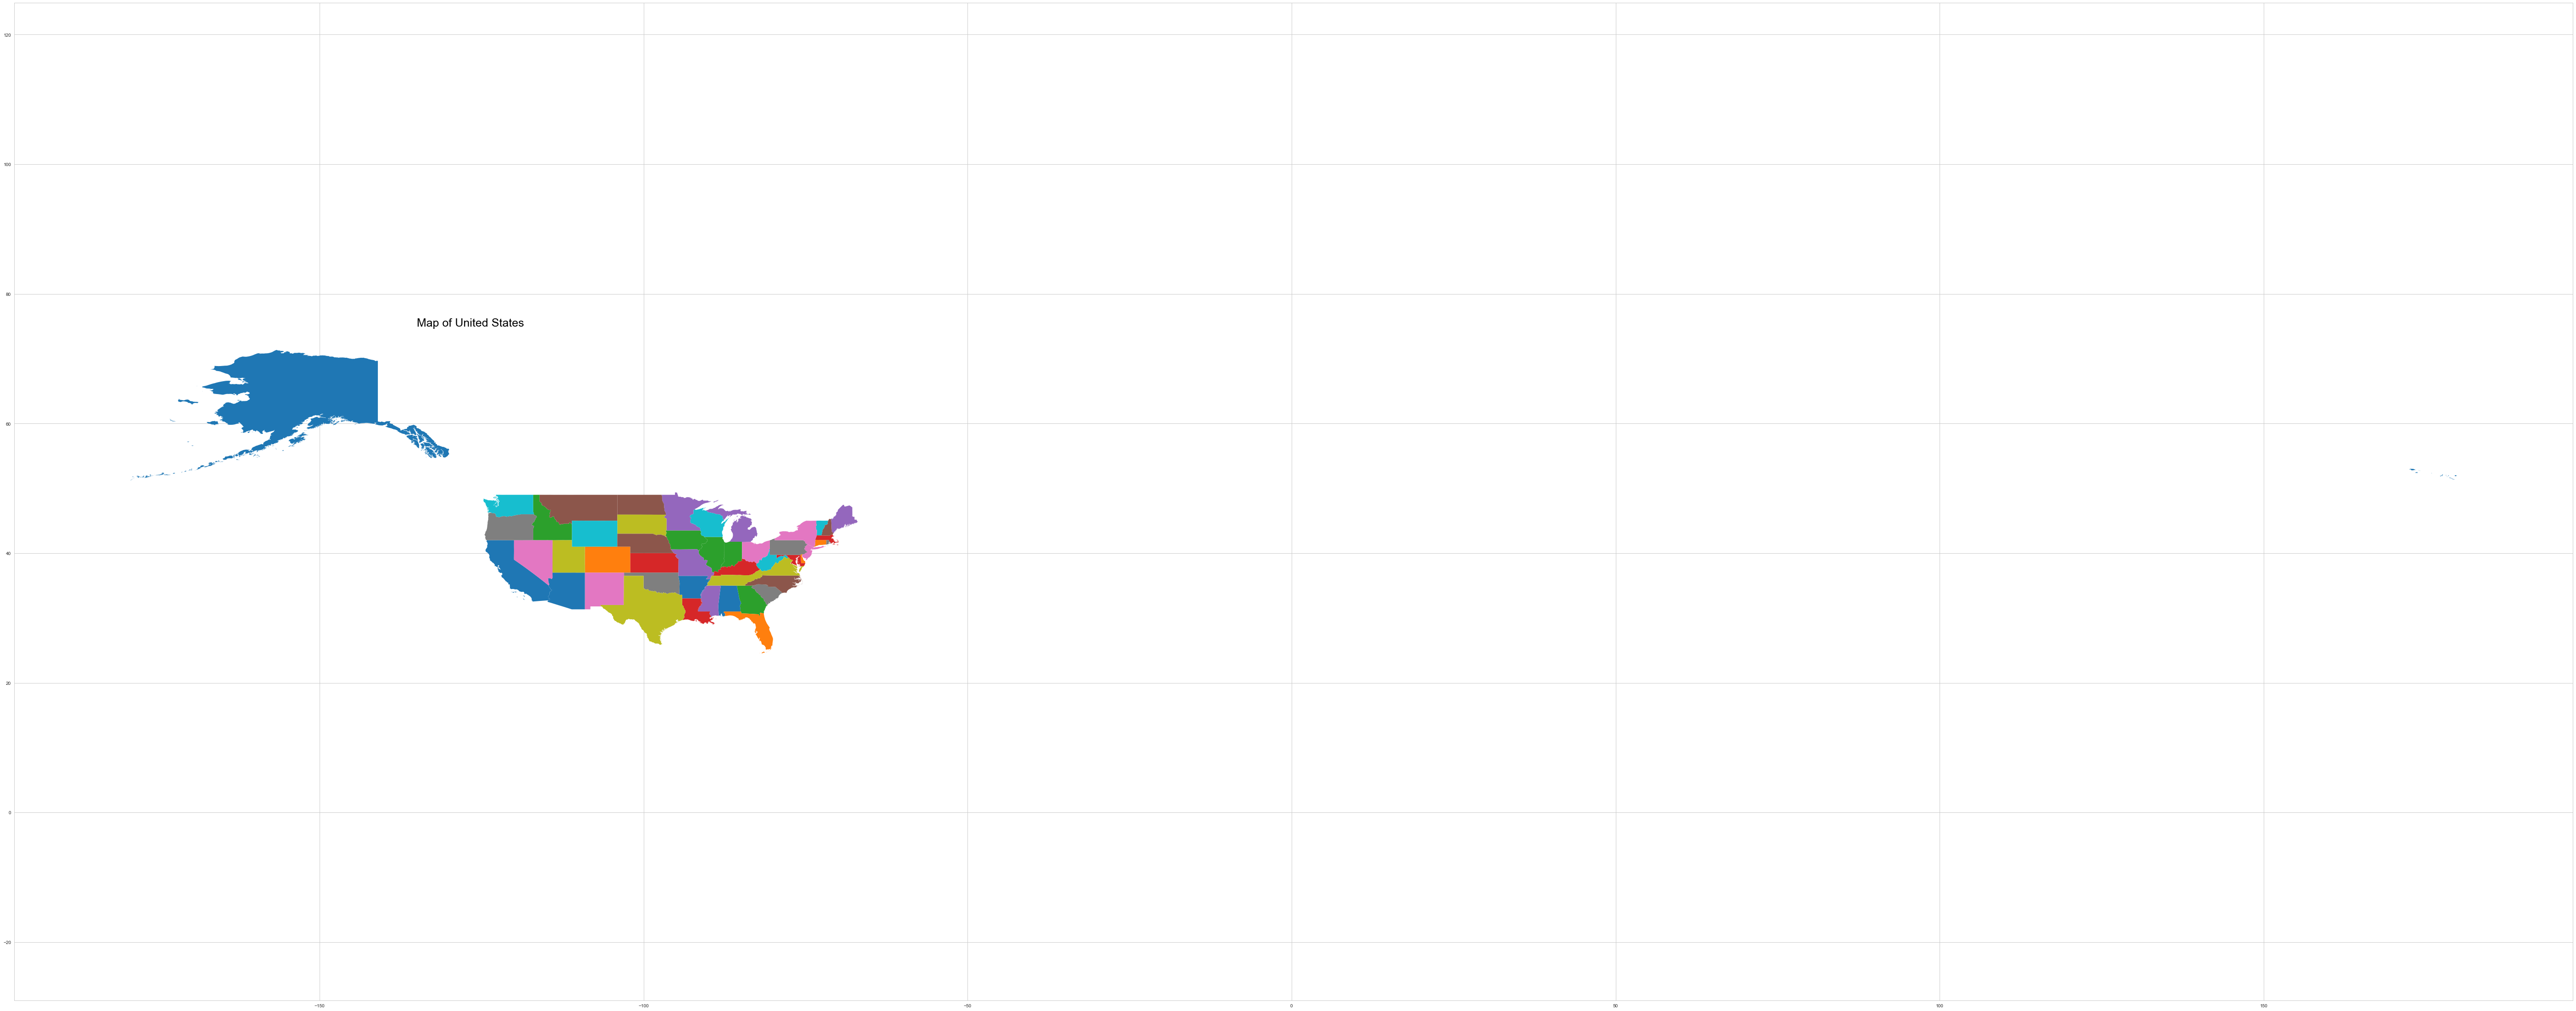

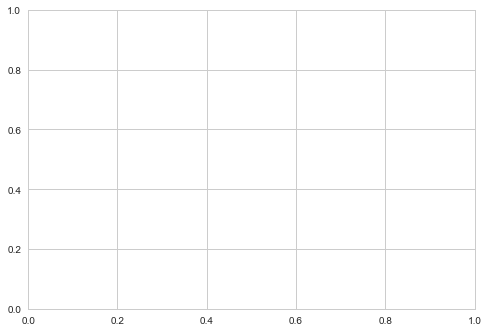

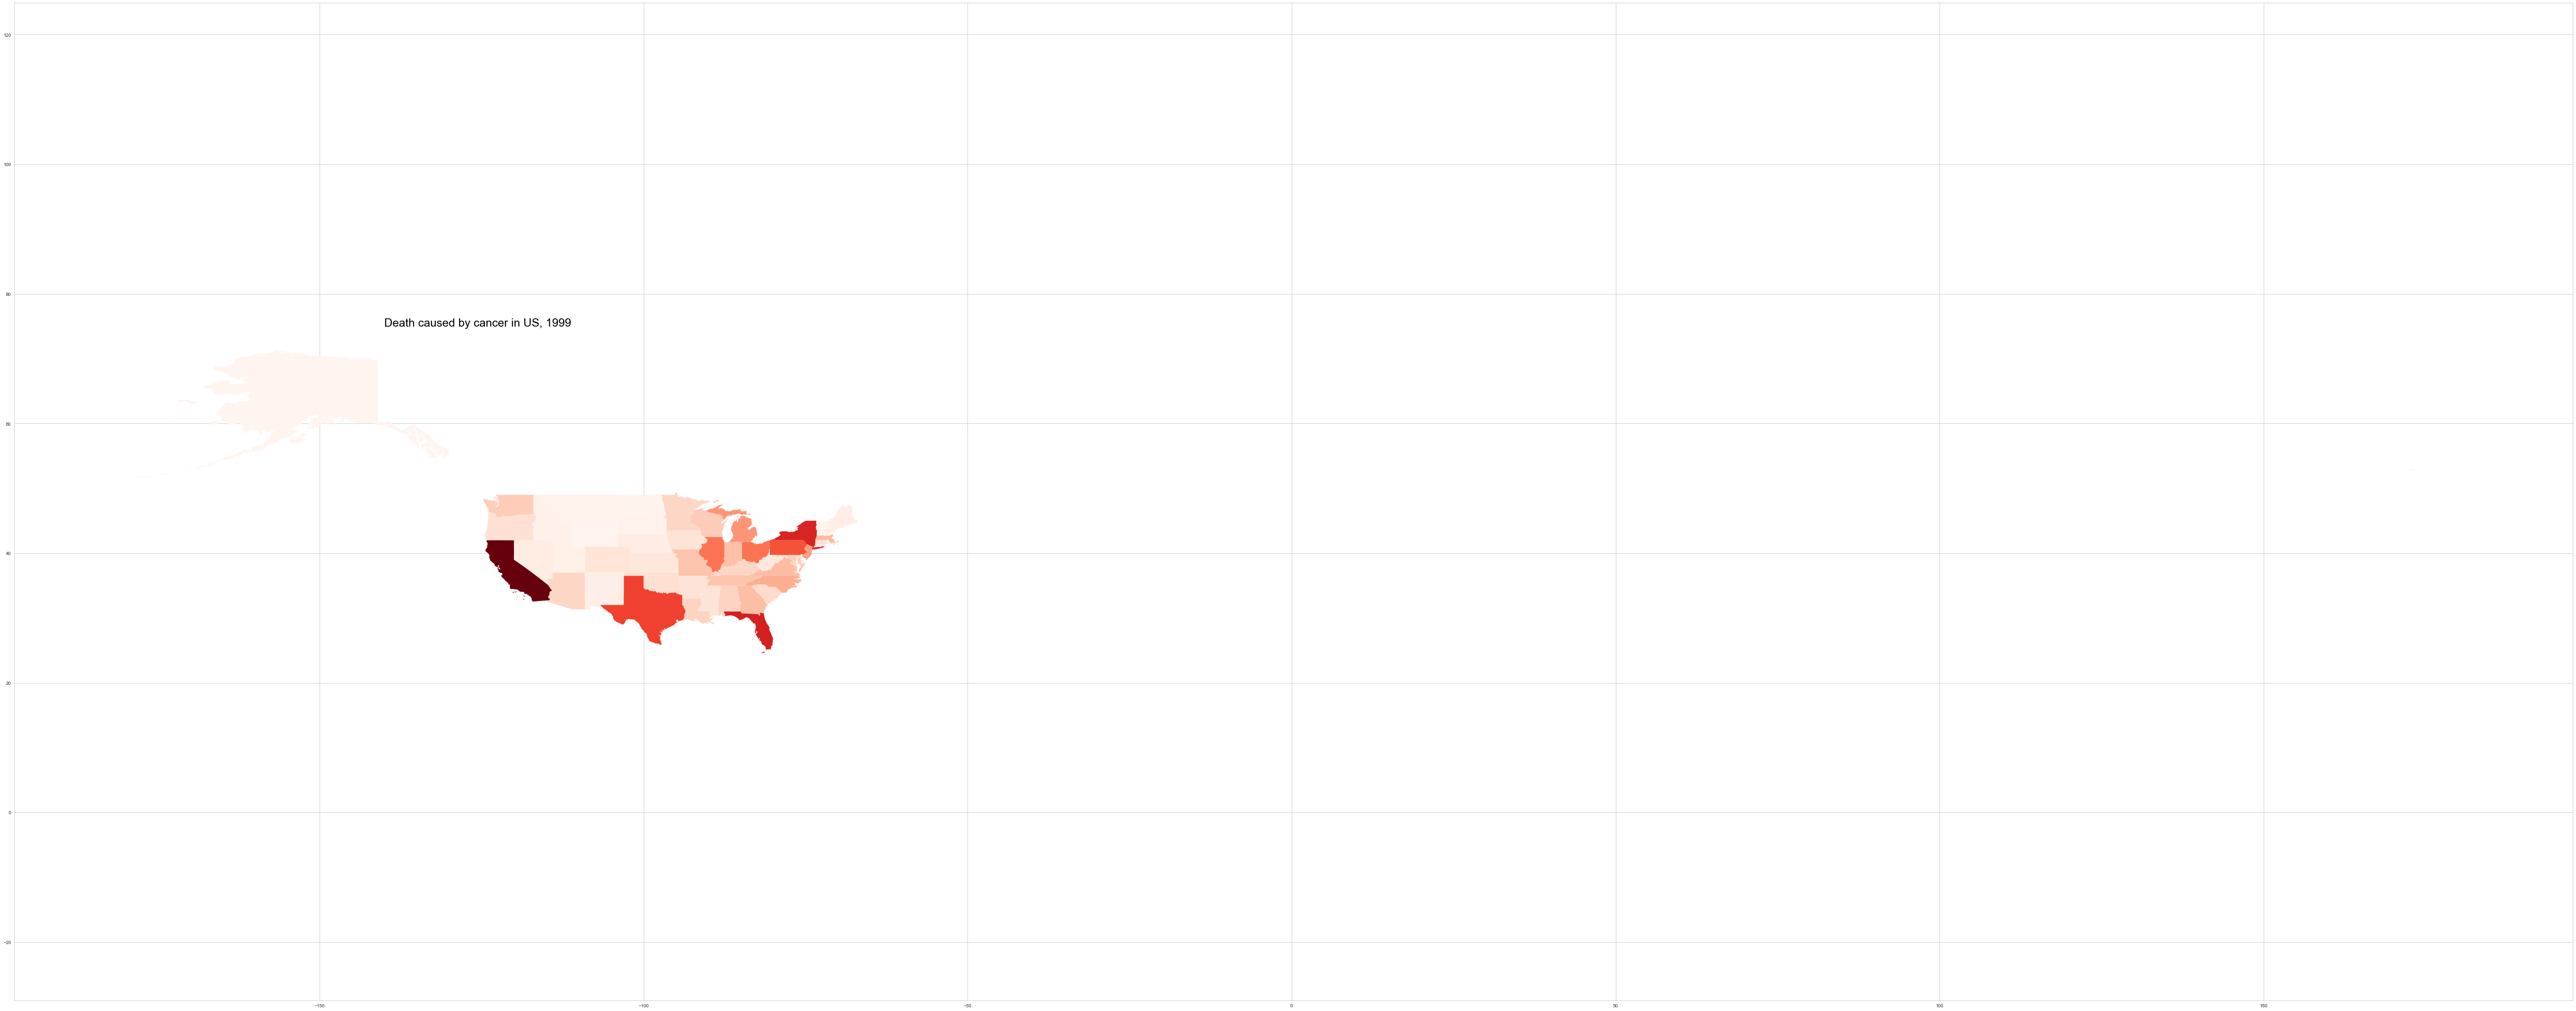

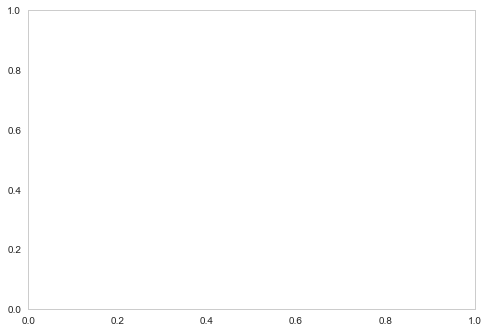

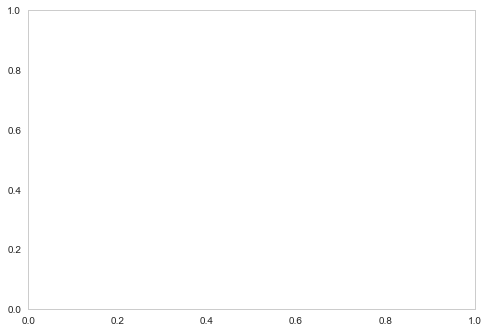

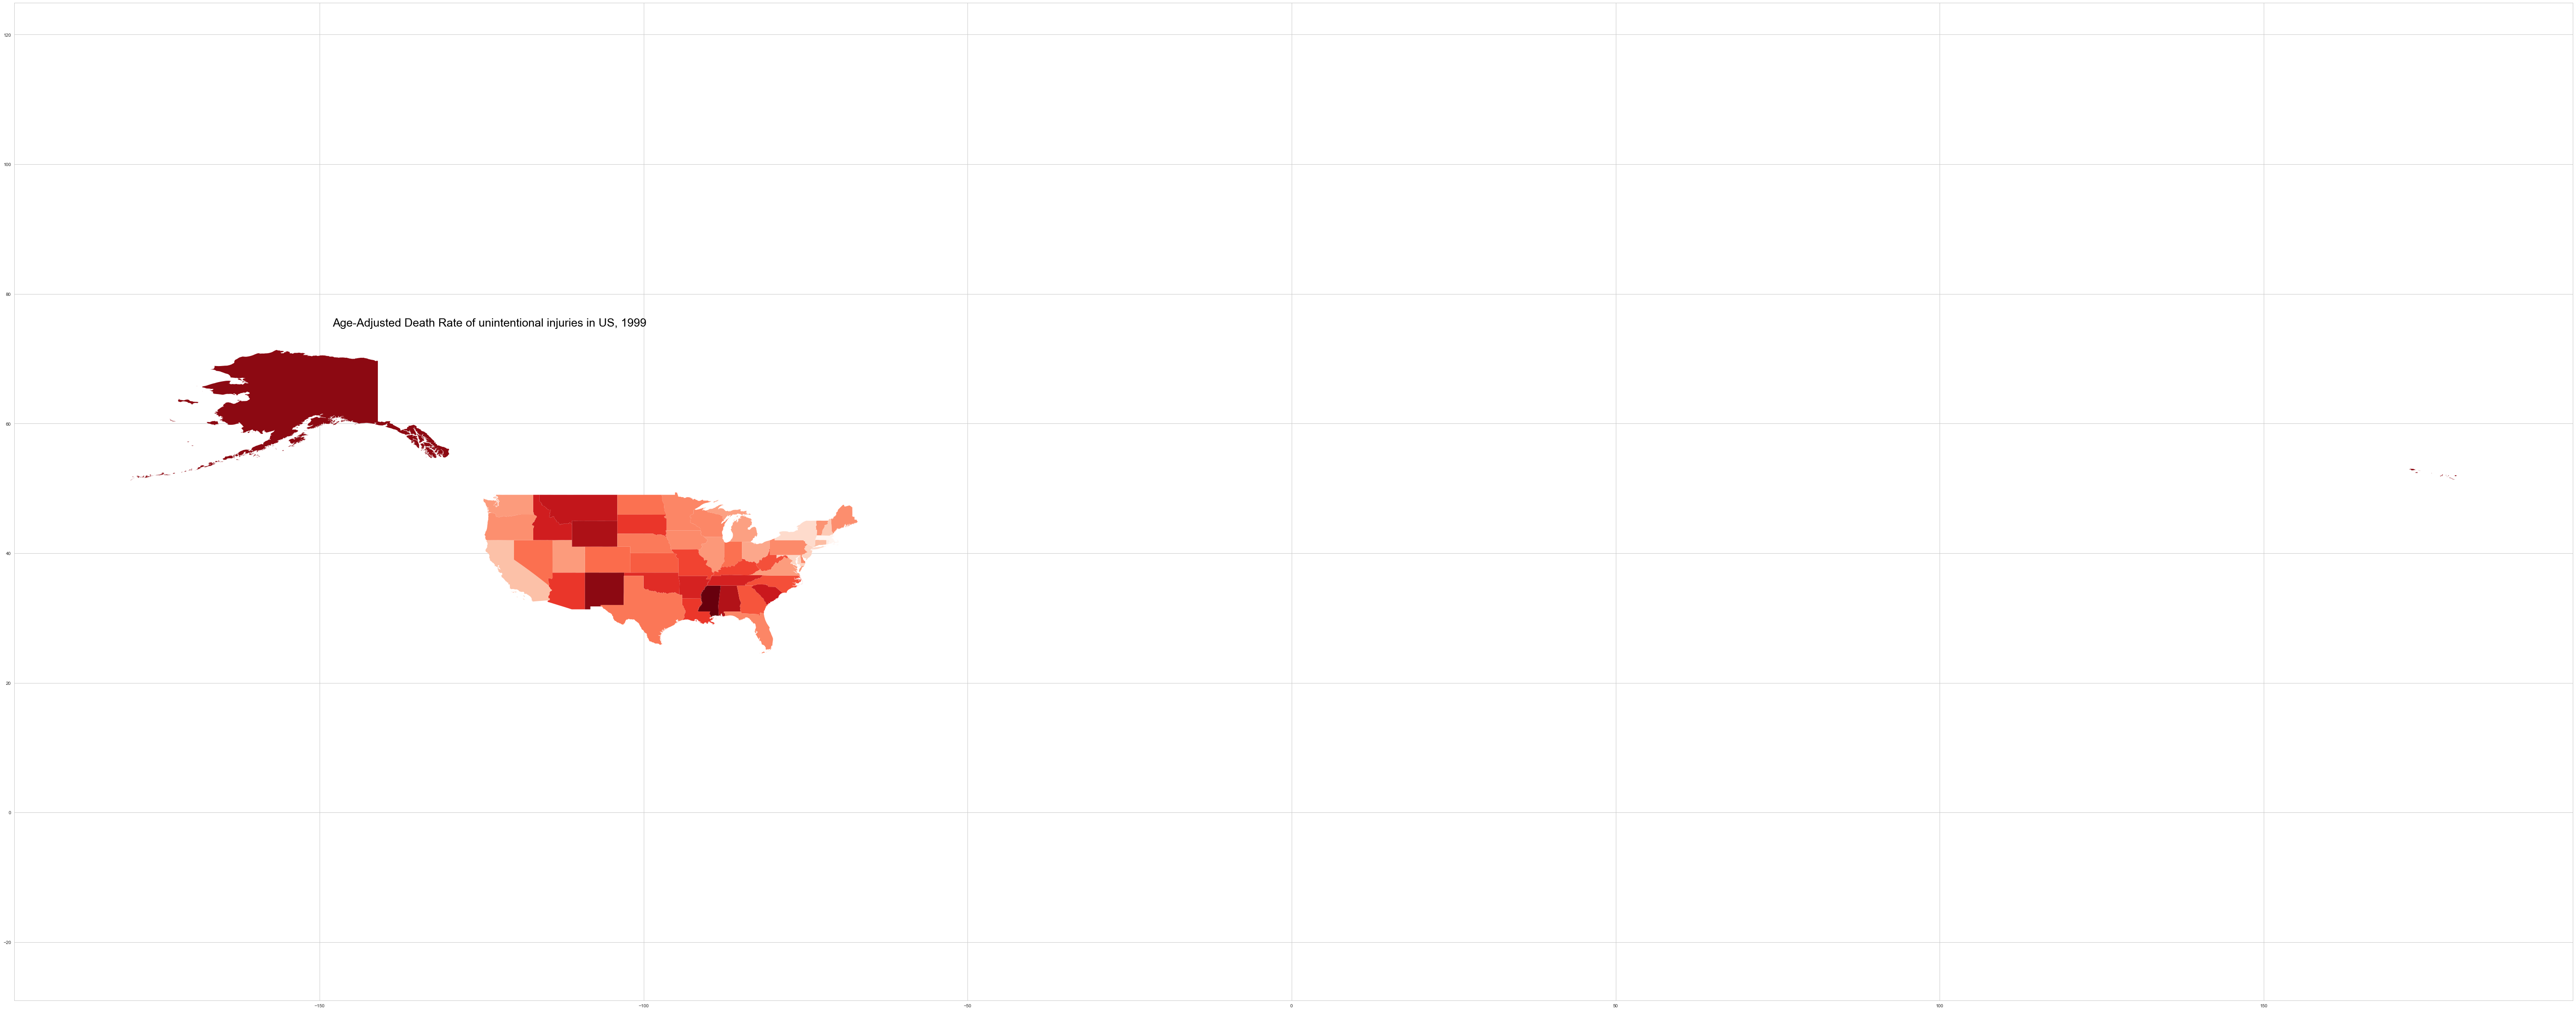

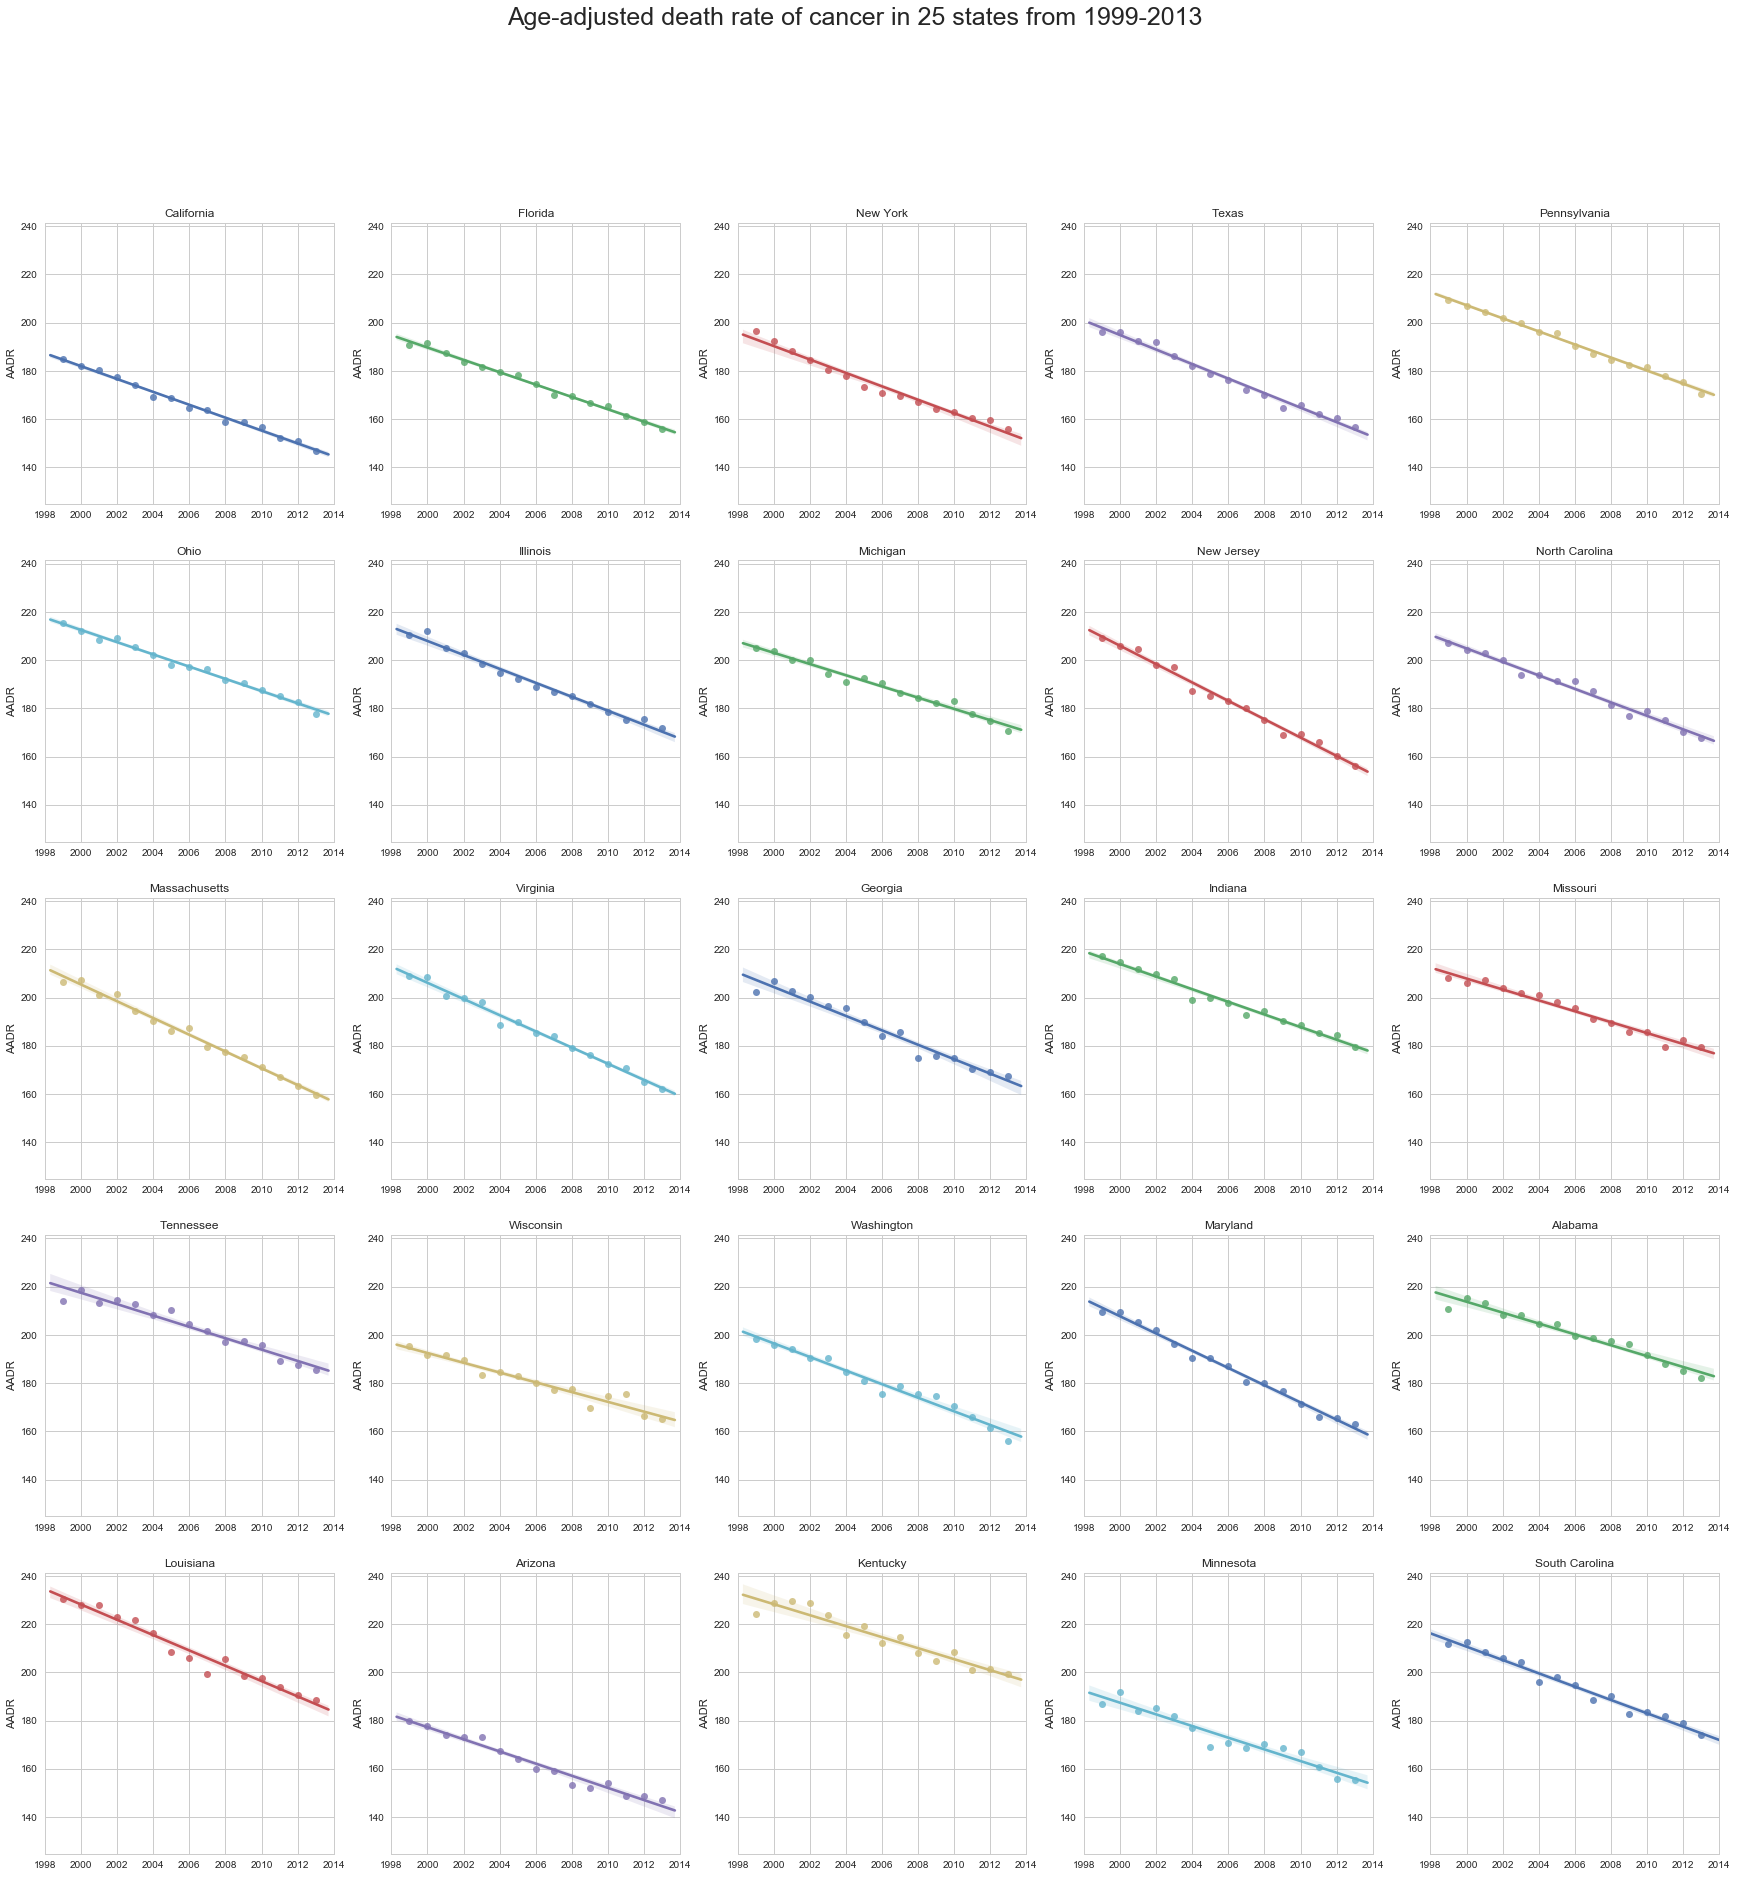

In [16]:
#Instead of extracting only information from 1999
#this time we are extracting all the data with the 'CAUSE_NAME' as cancer
complete_cancer_state_df = census_info.loc[census_info['CAUSE_NAME']=='Cancer']
complete_cancer_state_df[['DEATHS','AADR']]=complete_cancer_state_df[['DEATHS','AADR']].apply(pd.to_numeric)

#Picking the top 25 states with the highest cancer AADR
selected_25_states = ['California','Florida','New York','Texas','Pennsylvania',\
                      'Ohio','Illinois','Michigan','New Jersey','North Carolina',\
                      'Massachusetts','Virginia','Georgia','Indiana','Missouri',\
                      'Tennessee','Wisconsin','Washington','Maryland','Alabama',\
                      'Louisiana','Arizona','Kentucky','Minnesota','South Carolina'][::-1]
#Here defines the maximum and minimum value of the y-axis for the plot to visualize
#cancer AADR data across these 25 states
cancer_aadr_list = complete_cancer_state_df['AADR']
ylim_max = max(cancer_aadr_list)
ylim_min = min(cancer_aadr_list)

#Initializing plots, explicitly stating that we are going to construct a 5x5 multiplots
fig, axs = plt.subplots(ncols=5,nrows=5,figsize=(30,30))
#Main title of the plot
sns.plt.suptitle('Age-adjusted death rate of cancer in 25 states from 1999-2013',fontsize=25)
#Construct the 25 plot individually through these 2 for loops
for i in range(0,5):
    for j in range(0,5):
        #Pop the state name from the list - "selected_25_states"
        current_state = selected_25_states.pop()
        #Create a dataframe to store the disease information for the current state,
        #prepare for seaborn plot
        curr_state_cancer_df = complete_cancer_state_df.loc[complete_cancer_state_df['STATE']==current_state]
        #Construct seaborn plot with regplot(),
        #ax = axs[i,j] indicates where the plot will be placed in the figure 
        sns.regplot(x="YEAR", y="AADR", data=curr_state_cancer_df, ax=axs[i,j])
        #input information for each subplots
        axs[i,j].set_title(current_state)
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel('AADR')
        axs[i,j].set_ylim(ylim_min,ylim_max)
        axs[i,j].set_xlim(1998,2014)
        
plt.savefig('AADR of cancer in 25 states from 1999-2013.png',dpi=300)
plt.show()


E:\Anaconda\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


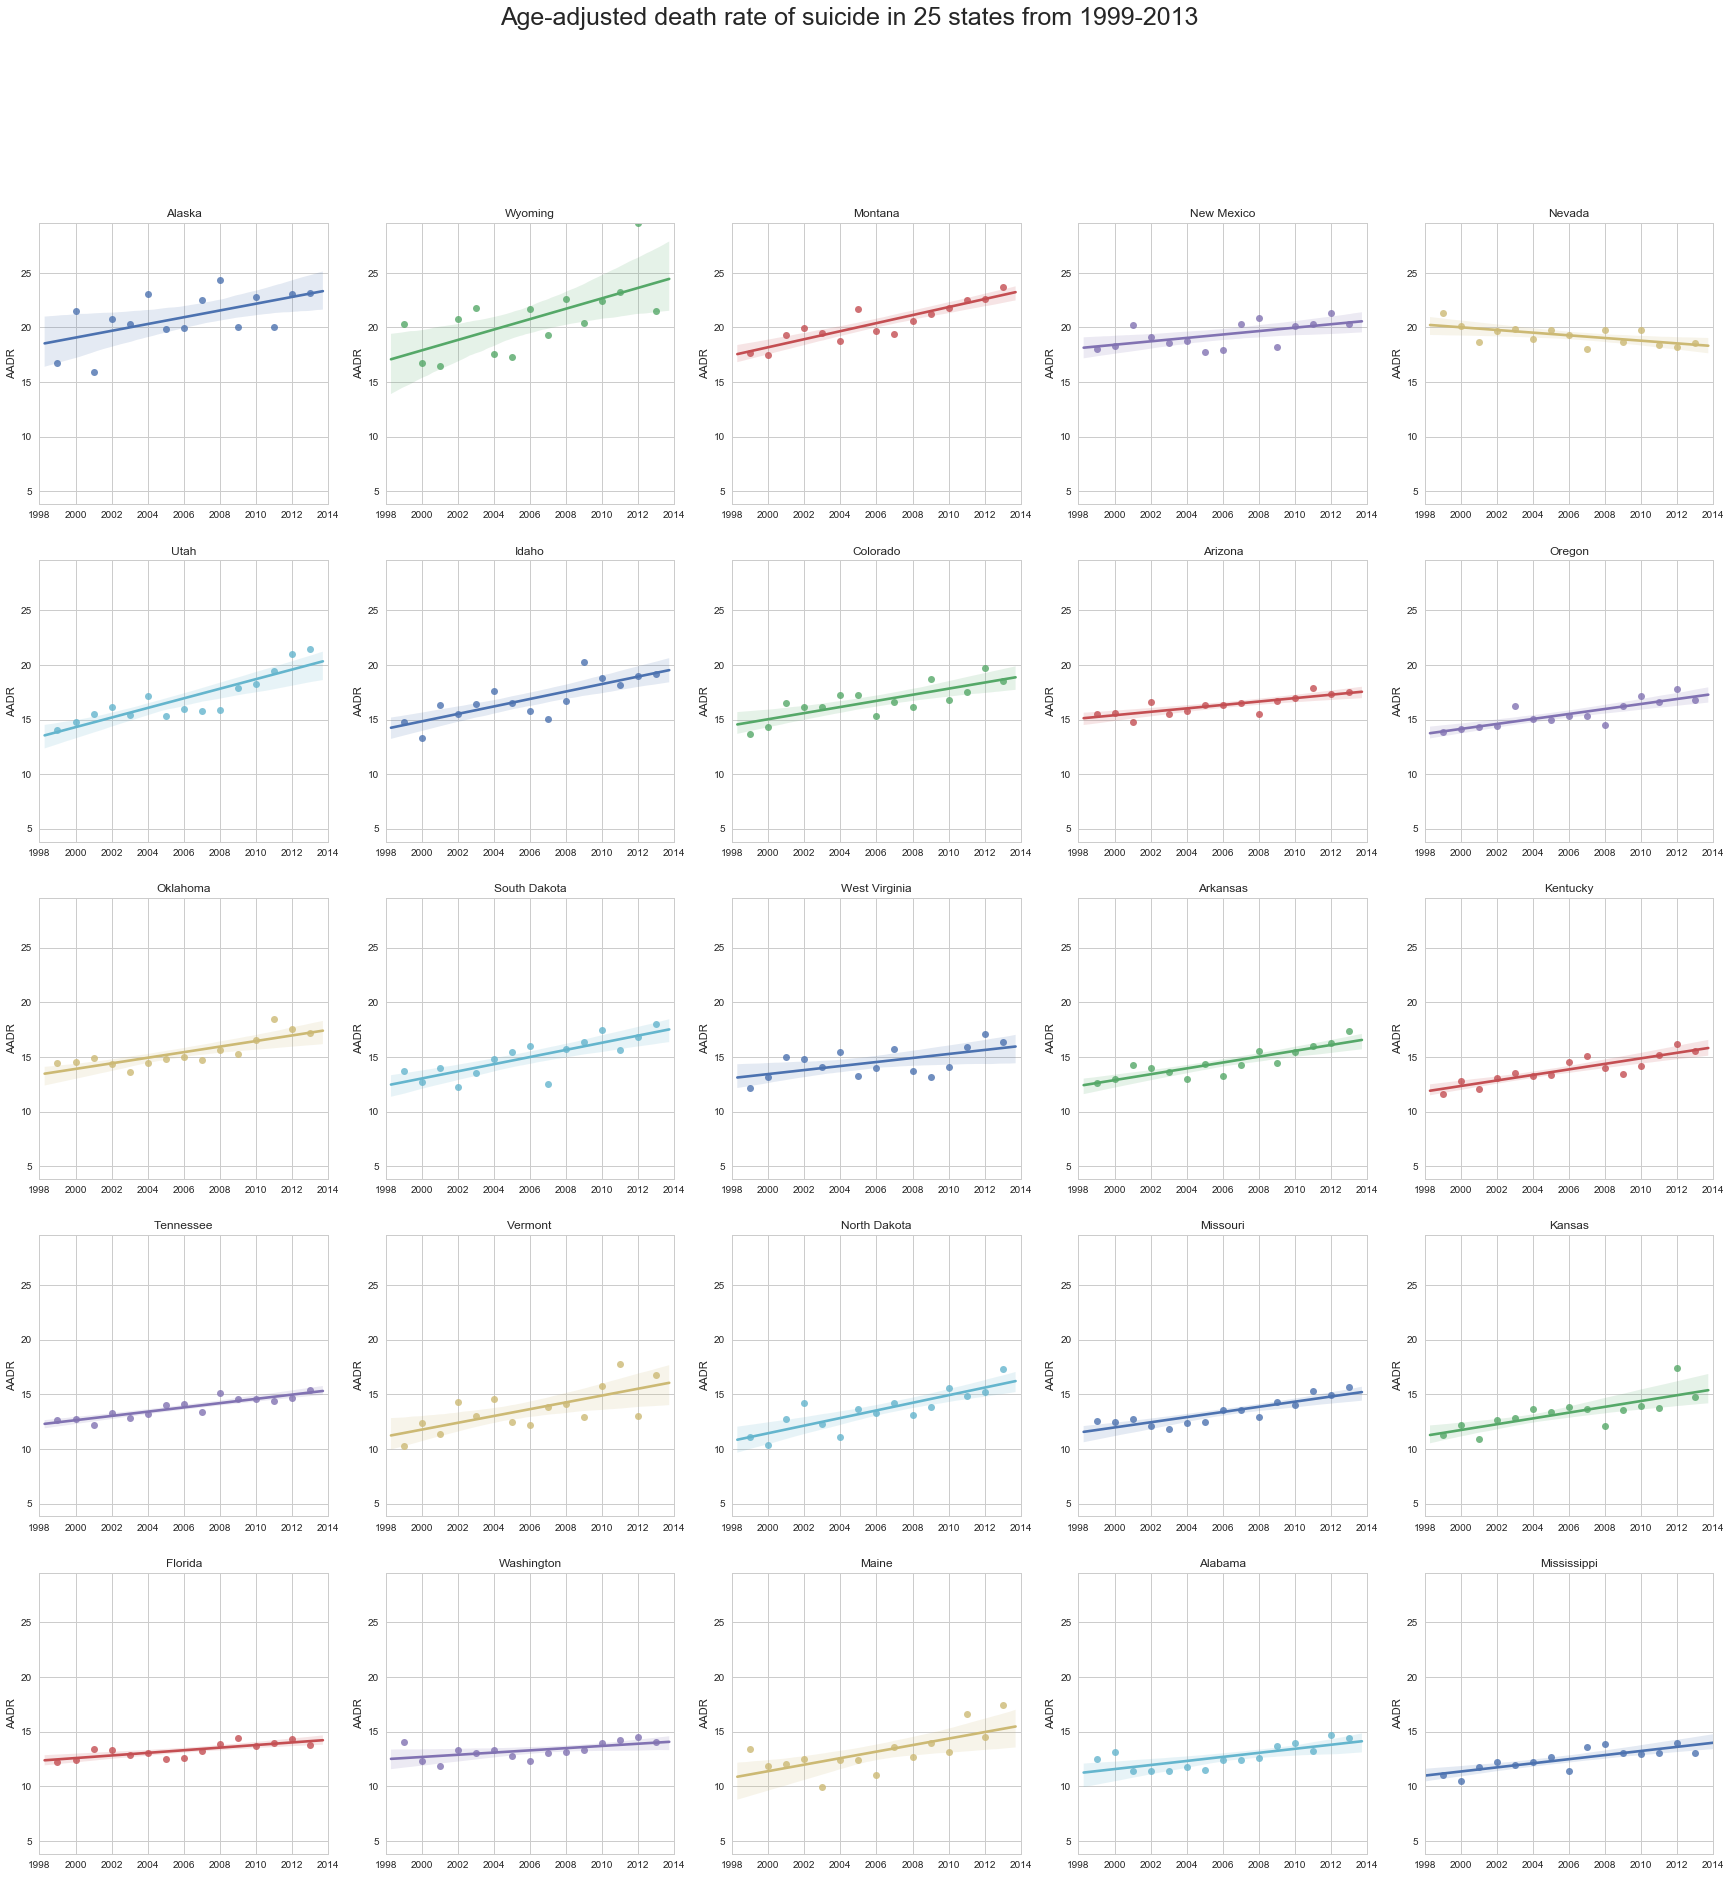

In [17]:
plt.clf()
#Constructing new dataframe that contains all the information from 'Suicide'
complete_suicide_state_df = census_info.loc[census_info['CAUSE_NAME']=='Suicide']
complete_suicide_state_df[['DEATHS','AADR']]=complete_suicide_state_df[['DEATHS','AADR']].\
    apply(pd.to_numeric)

#Initialize dictionary that could store the total AADR of suicide for individual states
#Initial value assigned as ZERO
all_states = set(complete_suicide_state_df['STATE'])
all_states_total_suicidal_dict = dict(zip(all_states,[0]*len(all_states)))

#Initialize dictionary that could store every AADR of suicide for individual states
#Data structure : Dictionary of List
#This will be useful for the next section
all_states_independent_suicidal_dict = {}
for each_state in all_states:
    all_states_independent_suicidal_dict[each_state]=[]

#Assigning AADR to the two dictionaries that we have initialized just now
for each_state in all_states:
    for year in range(1999,2014):
        #Construct new dataframe that contains suicide information for independent state 
        temp_state_suicide_df = complete_suicide_state_df.loc[complete_suicide_state_df['STATE']==\
                                                              each_state]
        #Obtain dataframe that contains suicide information for independent state for a particular year
        temp_year_df = temp_state_suicide_df.loc[temp_state_suicide_df['YEAR']==year]
        #Assign the AADR value to the two dictionaries initialized above
        all_states_total_suicidal_dict[each_state]=all_states_total_suicidal_dict[each_state]+\
        float(temp_year_df['AADR'])
        all_states_independent_suicidal_dict[each_state].append(float(temp_year_df['AADR']))

#Determine the mean AADR of suicide for each state
for state, total_suicidal_aadr in all_states_total_suicidal_dict.items():
    all_states_total_suicidal_dict[state]=total_suicidal_aadr/len(range(1999,2014))

#Identify the top 25 states that has the highest mean AADR of suicide
top_25_ranked_states = sorted(all_states_total_suicidal_dict, \
                              key=all_states_total_suicidal_dict.get,reverse=True)[0:25][::-1]

#Determining the maximum and minimum value of y-axis for visualization across these 25 states
suicide_aadr_list = complete_suicide_state_df['AADR']
ylim_max = max(suicide_aadr_list)
ylim_min = min(suicide_aadr_list)

#Initialize plots, explicitly stating its a 5x5 multiplot
fig, axs = plt.subplots(ncols=5,nrows=5,figsize=(30,30))
#Main title of the plot
sns.plt.suptitle('Age-adjusted death rate of suicide in 25 states from 1999-2013',fontsize=25)
#Similar to the plot shown above, here are the 2 for-loops that assign different subplots to their 
#respective position
for i in range(0,5):
    for j in range(0,5):
        #Extract the state by popping them from the list
        current_state = top_25_ranked_states.pop()
        #Construct new dataframe for that particular state
        curr_state_suicide_df = complete_suicide_state_df.loc[complete_suicide_state_df['STATE']==\
                                                              current_state]
        #Construct subgraph using sns.regplot
        sns.regplot(x="YEAR", y="AADR", data=curr_state_suicide_df, ax=axs[i,j])
        #input information for each subplots
        axs[i,j].set_title(current_state)
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel('AADR')
        axs[i,j].set_ylim(ylim_min,ylim_max)
        axs[i,j].set_xlim(1998,2014)
        
plt.savefig('AADR of suicide in 25 states from 1999-2013.png',dpi=300)
plt.show()

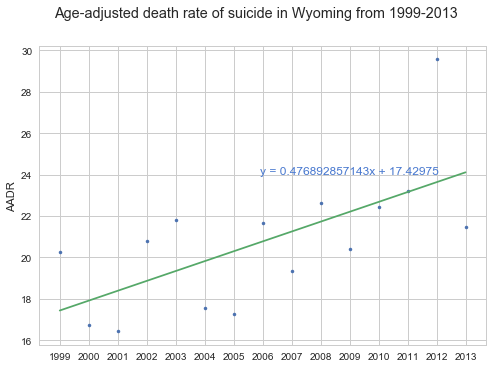

In [18]:
plt.clf()

f,ax=plt.subplots()
#Initialize dictionary to store the fitted rate of AADR from 1999-2013
all_states_fitted_AADR_trend = {}
x_line = range(0,15)

#In this for-loop, we are trying to fit a line to all the data point and estimate the slope of that
for each_state, suicidal_list in all_states_independent_suicidal_dict.items():
    #Line fitting
    poly_fit = np.polyfit(x_line,suicidal_list,1)
    #Extracting slope information for each state - the respective trend
    all_states_fitted_AADR_trend[each_state]=poly_fit[0]
    #Showcasing the process with the state Wyoming
    if each_state=='Wyoming':
        plt.suptitle('Age-adjusted death rate of suicide in Wyoming from 1999-2013')
        plt.plot(x_line,suicidal_list,'.')
        plt.plot(x_line,poly_fit[0]*x_line+poly_fit[1],'-')
        plt.xticks(x_line,range(1999,2014))
        plt.ylabel('AADR')
        plt.annotate('y = '+str(poly_fit[0])+'x + '+str(poly_fit[1]),(10,24),ha='center',color='b')

plt.savefig('AADR of suicide in Wyoming from 1999-2013.png',dpi=300)
plt.show()



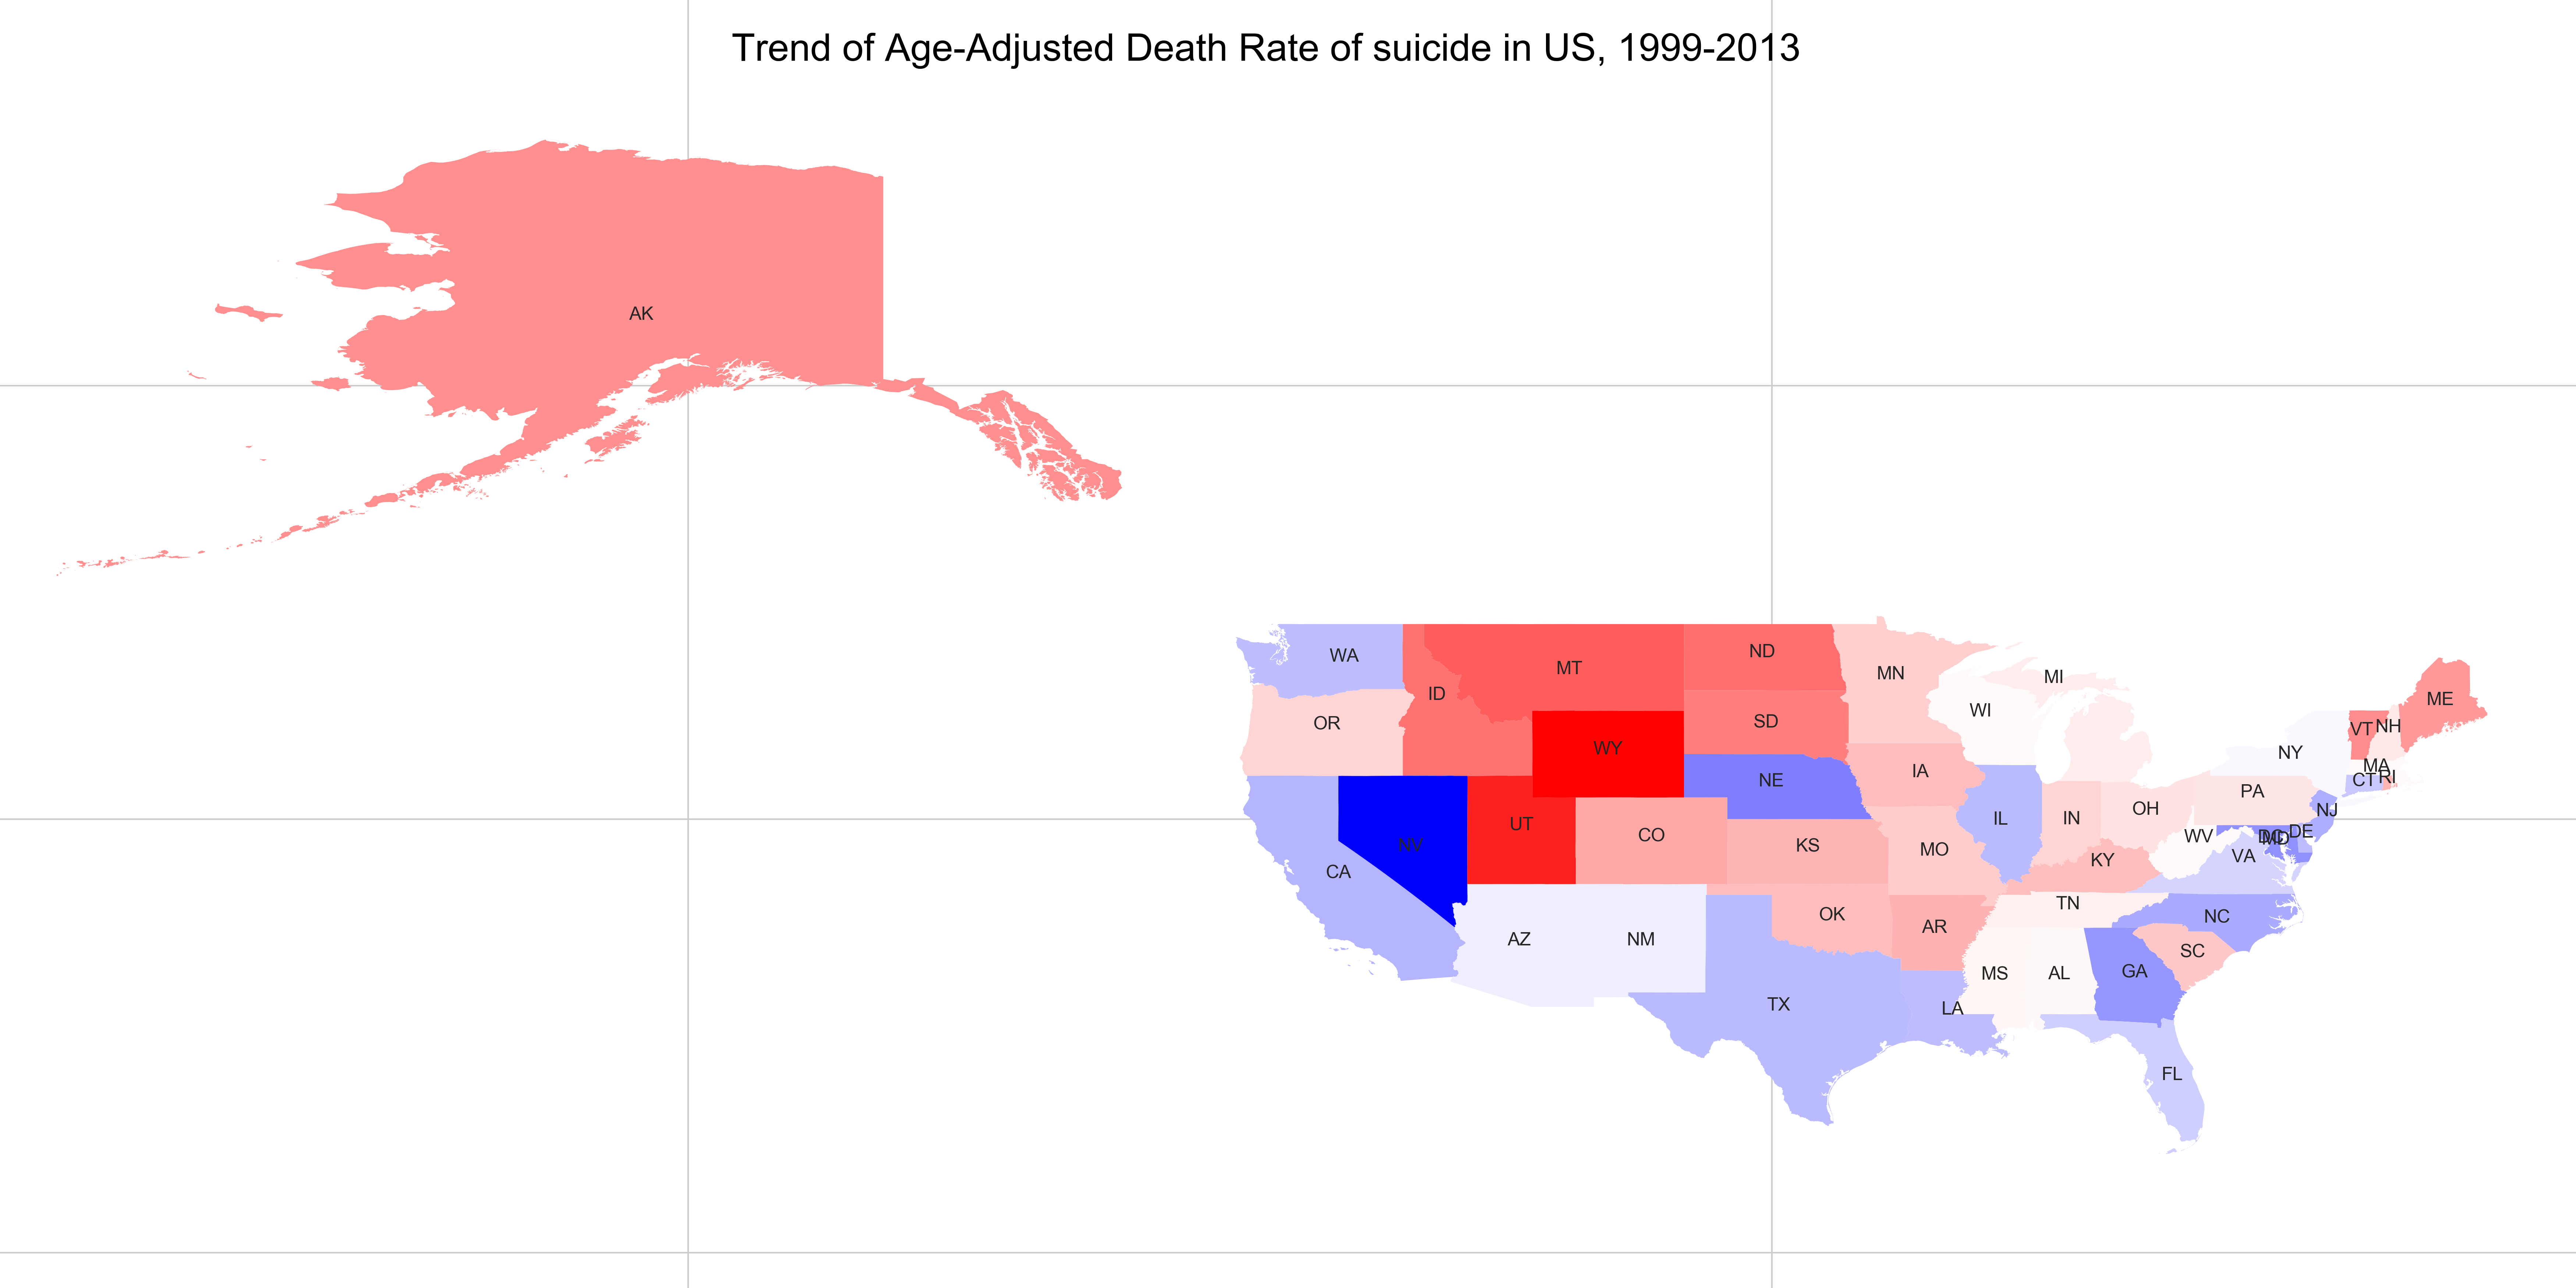

In [19]:
#Converting dictionary to dataframe, prepare for merging with refined_states GeoPandas dataframe
suicidal_rates_df = pd.DataFrame(list(all_states_fitted_AADR_trend.items()),columns=\
                                 ['STATE','INCREMENT RATE'])

#Merging with GeoPandas dataframe and prepare for map plotting
merged_suicide_increment_df = pd.merge(refined_states,suicidal_rates_df, on='STATE')

#More tricks on labeling the map
#Let's modify the dataframe and introduce a new column called 'stusps_coords'
#This column will store the coordinate information for each state abbreviation
merged_suicide_increment_df['stusps_coords'] = merged_suicide_increment_df['geometry'].\
apply(lambda x: x.representative_point().coords[:])
merged_suicide_increment_df['stusps_coords'] = [coords[0] for coords in\
                                                merged_suicide_increment_df['stusps_coords']]

#Plotting map, with color indicating the increment rate
merged_suicide_increment_df.plot(column='INCREMENT RATE',cmap='bwr',figsize=(100,40))
#Putting state abbreviation onto the map
for idx, row in merged_suicide_increment_df.iterrows():
    plt.annotate(s=row['STUSPS'],xy=row['stusps_coords'],horizontalalignment='center')

plt.axis('equal')
plt.annotate('Trend of Age-Adjusted Death Rate of suicide in US, 1999-2013',xy=(-148,75),\
             color='black',size=25)
plt.savefig('Trend_of_AADR_of_suicide_in_US.png',dpi=300)

#Trimming the plot to give a larger image using PIL library and Image processing
suicide_increment_visualization_img = trim('Trend_of_AADR_of_suicide_in_US.png')
suicide_increment_visualization_img.save('Trend_of_AADR_of_suicide_in_US_crop.png')
suicide_increment_visualization_img


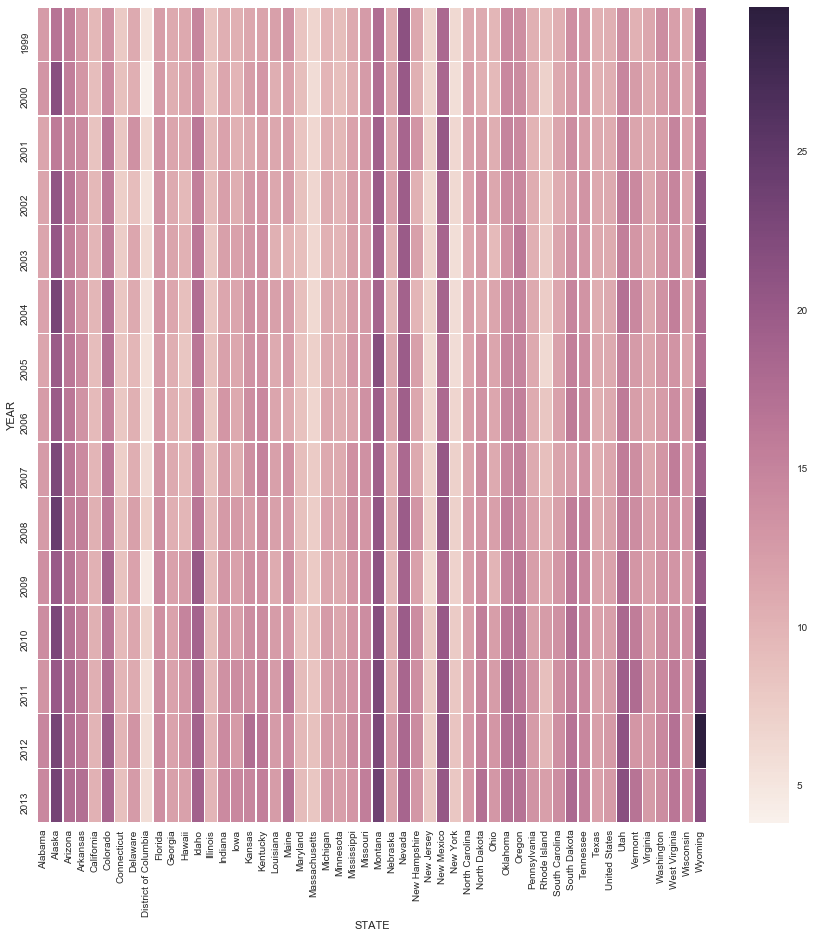

In [20]:
plt.clf()

#By using the .pivot() method in Pandas library, readers can create a pivot table
#and simply parse it to seaborn for visualization
heatmap_df = complete_suicide_state_df.pivot('YEAR','STATE','AADR')

sns.set()
f,ax = plt.subplots(figsize=(15,15))
#plotting heatmap with the seaborn library
sns.heatmap(heatmap_df, linewidths=0.3, ax=ax)
plt.savefig('heatmap_suicide_AADR.png',dpi=300)
plt.show()

In [21]:
#Calculate correlation among states
corr_df = heatmap_df.corr()
#Show the first 5 lines from the correlation dataframe
corr_df.head()

STATE        Alabama    Alaska   Arizona  Arkansas  California  Colorado  \
STATE                                                                      
Alabama     1.000000  0.441934  0.667451  0.667113    0.606576  0.507087   
Alaska      0.441934  1.000000  0.405809  0.456981    0.615688  0.386017   
Arizona     0.667451  0.405809  1.000000  0.686619    0.646841  0.624618   
Arkansas    0.667113  0.456981  0.686619  1.000000    0.576276  0.727726   
California  0.606576  0.615688  0.646841  0.576276    1.000000  0.431089   

STATE       Connecticut  Delaware  District of Columbia   Florida    ...     \
STATE                                                                ...      
Alabama        0.768300  0.443227             -0.080866  0.589588    ...      
Alaska         0.272008 -0.003831              0.238349  0.375888    ...      
Arizona        0.556479 -0.052349             -0.098132  0.529121    ...      
Arkansas       0.630535  0.498206              0.414993  0.762468    ...      
California     0.424057  0.122522              0.254083  0.610889    ...      

STATE       Tennessee     Texas  United States      Utah   Vermont  Virginia  \
STATE                                                                          
Alabama      0.683404  0.593106       0.796376  0.765944  0.387141  0.801539   
Alaska       0.618279  0.299035       0.526681  0.470049  0.572059  0.355524   
Arizona      0.694571  0.674694       0.824260  0.809134  0.722823  0.755421   
Arkansas     0.787560  0.805496       0.921564  0.845354  0.682375  0.885685   
California   0.711576  0.571418       0.743295  0.597420  0.678870  0.665242   

STATE       Washington  West Virginia  Wisconsin   Wyoming  
STATE                                                       
Alabama       0.637074       0.338000   0.630335  0.619940  
Alaska        0.350219       0.405381   0.551696  0.386371  
Arizona       0.705047       0.537982   0.624330  0.575614  
Arkansas      0.553653       0.626923   0.840058  0.581870  
California    0.767222       0.269360   0.684559  0.640033  

[5 rows x 52 columns]

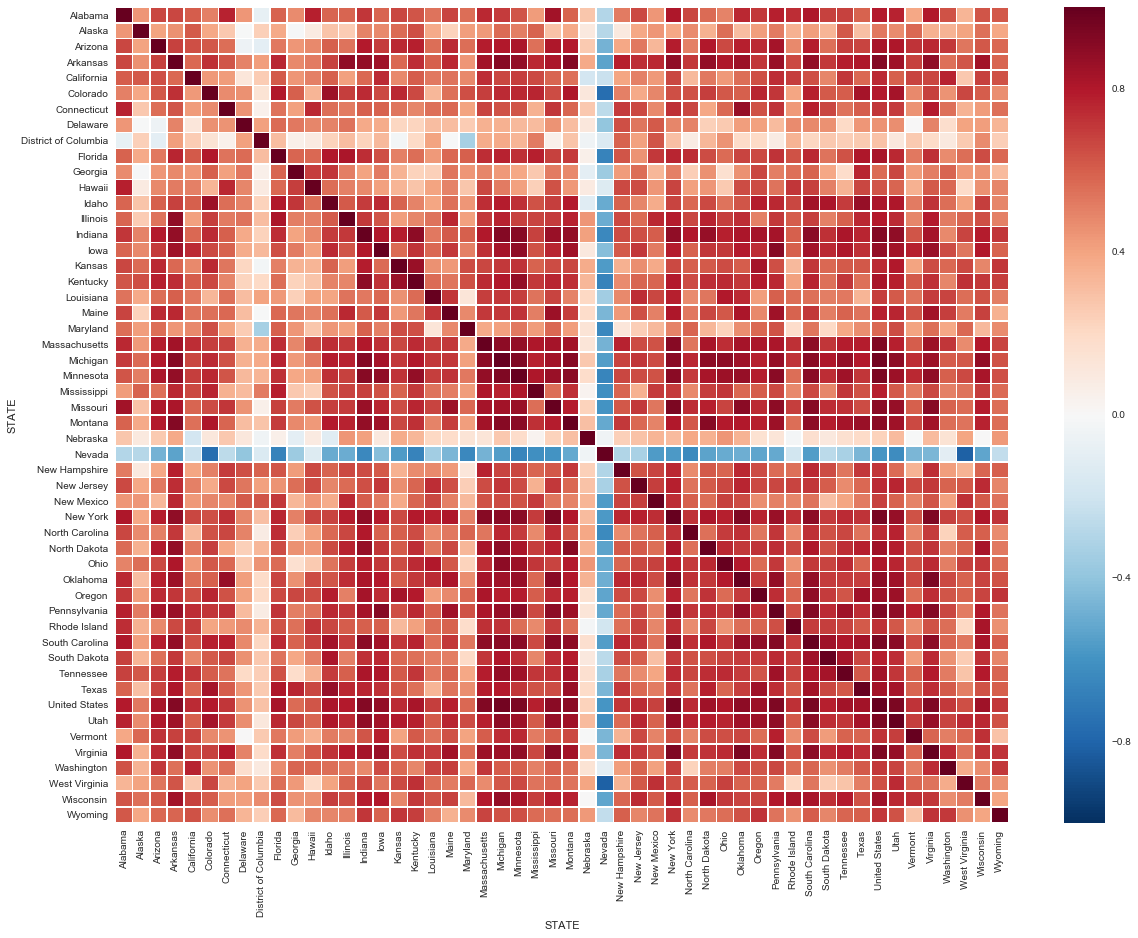

In [22]:
sns.set()
f,ax = plt.subplots(figsize=(20,15))
# plotting heatmap with the seaborn library
sns.heatmap(corr_df, linewidths=0.5, ax=ax)
plt.show()

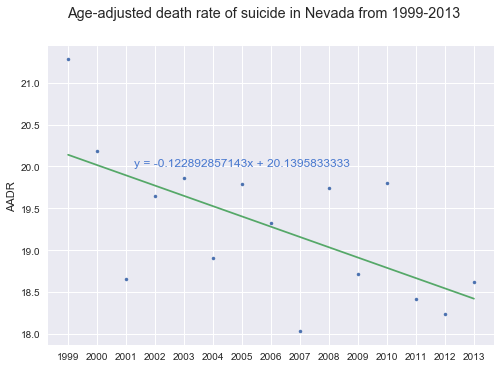

In [23]:
plt.clf()
f,ax=plt.subplots(nrows=1,ncols=1)

#Similar to script above, but this time we are showing the graph fitting results from Nevada
for each_state, suicidal_list in all_states_independent_suicidal_dict.items():
    poly_fit = np.polyfit(x_line,suicidal_list,1)
    if each_state=='Nevada':
        plt.suptitle('Age-adjusted death rate of suicide in Nevada from 1999-2013')
        plt.plot(x_line,suicidal_list,'.')
        plt.plot(x_line,poly_fit[0]*x_line+poly_fit[1],'-')
        plt.ylabel('AADR')
        plt.xticks(x_line,range(1999,2014))
        plt.annotate('y = '+str(poly_fit[0])+'x + '+str(poly_fit[1]),(6,20),ha='center',color='b')

plt.savefig('AADR of suicide in Nevada from 1999-2013.png',dpi=300)
plt.show()

In [ ]:
# Survival data analysis on cancer

In [24]:

#The clinical dataset are in tsv format
#We can use the .read_csv() method and add an argument sep='\t' to construct the dataframe
gbm_df = pd.read_csv('gbm_tcga_clinical_data.tsv',sep='\t')
gbm_primary_df = gbm_df[gbm_df['Sample Type']=='Primary Tumor'].dropna(subset=\
                                                                       ['Overall Survival (Months)'])

brca_df = pd.read_csv('brca_metabric_clinical_data.tsv',sep='\t')
brca_primary_df = brca_df[brca_df['Sample Type']=='Primary'].dropna(subset=\
                                                                    ['Overall Survival (Months)'])

brca_primary_df.head()

Patient ID Sample ID  Nottingham prognostic index    Cancer Type  \
0    MB-0002   MB-0002                        4.020  Breast Cancer   
1    MB-0005   MB-0005                        4.030  Breast Cancer   
2    MB-0006   MB-0006                        4.050  Breast Cancer   
3    MB-0010   MB-0010                        4.062  Breast Cancer   
4    MB-0014   MB-0014                        4.020  Breast Cancer   

               Cancer Type Detailed Cellularity Chemotherapy  Cohort  \
0  Breast Invasive Ductal Carcinoma        high           NO     1.0   
1  Breast Invasive Ductal Carcinoma        high          YES     1.0   
2  Breast Invasive Ductal Carcinoma    moderate          YES     1.0   
3  Breast Invasive Ductal Carcinoma    moderate           NO     1.0   
4  Breast Invasive Ductal Carcinoma    moderate          YES     1.0   

  ER Status ER status measured by IHC          ...            \
0         +                       pos          ...             
1         +                       pos          ...             
2         +                       pos          ...             
3         +                       pos          ...             
4         +                       pos          ...             

  3-Gene classifier subtype Patient's Vital Status Primary Tumor Laterality  \
0     ER+/HER2- High Prolif                 Living                        r   
1                       NaN        Died of Disease                        r   
2                       NaN                 Living                        r   
3     ER+/HER2- High Prolif        Died of Disease                        l   
4                       NaN                 Living                        r   

  Radio Therapy Cancer Studies  Sample Type  Tumor Other Histologic Subtype  \
0           YES  brca_metabric      Primary                             IDC   
1            NO  brca_metabric      Primary                             IDC   
2           YES  brca_metabric      Primary                             IDC   
3           YES  brca_metabric      Primary                             IDC   
4           YES  brca_metabric      Primary                             IDC   

  Tumor Size  Tumor Stage Type of Breast Surgery  
0       10.0          1.0      BREAST CONSERVING  
1       15.0          2.0             MASTECTOMY  
2       25.0          2.0             MASTECTOMY  
3       31.0          4.0             MASTECTOMY  
4       10.0          2.0      BREAST CONSERVING  

[5 rows x 32 columns]

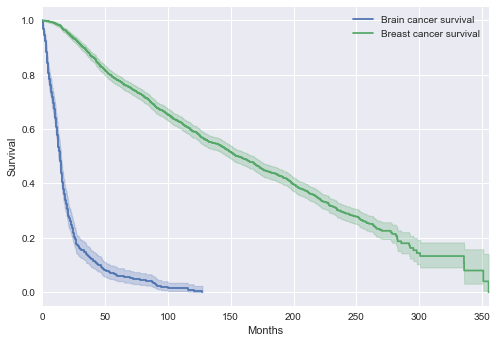

In [25]:
#We need to use the lifelines library for this analysis
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter

#Initialize
fig, ax = plt.subplots()

#Shaping the brain cancer data, extracting the Overall Survival (Months) information to a list
gbm_overall_survival_original = gbm_primary_df['Overall Survival (Months)']
#Type casting, make sure all values in the list are in type 'float'
gbm_overall_survival_input = [float(x) for x in gbm_overall_survival_original]
#Extracting the Overall Survival Status
gbm_censored_original = gbm_primary_df['Overall Survival Status']
#Convert the Overall Survival Status to the lifelines format, it accepts 1 as deceased and
#0 as alive for input
gbm_censored_input = []
for record in gbm_censored_original:
    if record == 'DECEASED':
        gbm_censored_input.append(1)
    else:
        gbm_censored_input.append(0)

#Doing the same for breast cancer data, extracting the Overall Survival (Months) information to a list
brca_overall_survival_original = brca_primary_df['Overall Survival (Months)']
#Type casting, make sure all values in the list are in type 'float'
brca_overall_survival_input = [float(x) for x in brca_overall_survival_original]
#Extracting the Overall Survival Status
brca_censored_original = brca_primary_df['Overall Survival Status']
#Convert the Overall Survival Status to the lifelines format, it accepts 1 as deceased and
#0 as alive for input
brca_censored_input = []
for record in brca_censored_original:
    if record == 'DECEASED':
        brca_censored_input.append(1)
    else:
        brca_censored_input.append(0)

#Initialize KaplanMeierFitter for Kaplan-Meier (KM) survival analysis and visualization
kmf = KaplanMeierFitter()
#Fitting brain cancer survival data to the graph
kmf.fit(gbm_overall_survival_input,event_observed=gbm_censored_input,label='Brain cancer survival')
kmf.plot(ax=ax,show_censors=False,ci_show=True)
#Fitting breast cancer survival data to the graph
kmf.fit(brca_overall_survival_input,event_observed=brca_censored_input,label='Breast cancer survival')
kmf.plot(ax=ax,show_censors=False,ci_show=True)
#Labeling the graphs
plt.ylabel('Survival')
plt.xlabel('Months')
plt.savefig('GBM_BRCA_KM_survival.png',dpi=300)
plt.show()



In [26]:
#Performing log rank test
gbm_brca_lgr_result = logrank_test(gbm_overall_survival_input,brca_overall_survival_input,\
                         event_observed_A=gbm_censored_input,event_observed_B=brca_censored_input)
gbm_brca_lgr_result

<lifelines.StatisticalResult: 
Results
   t 0: -1
   test: logrank
   alpha: 0.95
   null distribution: chi squared
   df: 1

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00000 |           2211.578 |      Reject Null    |        True       
>